In [1]:
import zarr
import napari
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed tw

# Immobilized

## Segmentation

In [7]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\1-segmentation\masks_4500.zarr"
z = zarr.open(fname)
cmap = {i+1:'gray' for i in range(5000)}
napari.view_labels(z, ndisplay=3, color=cmap);

## Training data

In [9]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\2-training_data\reindexed_segmentation.zarr"
z = zarr.open(fname)
napari.view_labels(z, ndisplay=3);

## Tracking

In [10]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\3-tracking\segmentation_from_tracking.zarr"
z = zarr.open(fname)
napari.view_labels(z, ndisplay=3);

## Final Matches

In [110]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\4-traces\reindexed_masks.zarr"
z = zarr.open(fname)
napari.view_labels(z, ndisplay=3);

# WBFM visualizations

In [ ]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long\4-traces\reindexed_masks.zarr"
seg = zarr.open(fname)
fname = r"Y:\shared_projects\wbfm\dat\ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051-channel-1-pco_camera2\2021-03-04_16-07-57_worm3_ZIM2051-channel-1-pco_camera2bigtiff.zarr"
dat_green = zarr.open(fname) #np.fliplr(zarr.open(fname))

fname = r"Y:\shared_projects\wbfm\dat\ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1\2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1bigtiff.zarr"
dat_red = zarr.open(fname)
# cmap = {i+1:'gray' for i in range(5000)}
viewer = napari.view_labels(seg, ndisplay=3);
viewer.add_image(dat_red);
viewer.add_image(dat_green);

In [775]:
# # Just one frame
# from DLC_for_WBFM.utils.video_and_data_conversion.import_video_as_array import get_single_volume

# fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long\4-traces\reindexed_masks.zarr"
# seg = zarr.open(fname)
# fname = r"Y:\shared_projects\wbfm\dat\ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051-channel-1-pco_camera2\2021-03-04_16-07-57_worm3_ZIM2051-channel-1-pco_camera2bigtiff.btf"
# dat_green = np.flip(get_single_volume(fname, 0, 32, 0.15), axis=2)

# fname = r"Y:\shared_projects\wbfm\dat\ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1\2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1bigtiff.btf"
# dat_red = get_single_volume(fname, 0, 32, 0.15)

# # viewer = napari.view_labels(seg, ndisplay=3);
# viewer = napari.Viewer()
# viewer.add_image(dat_red);
# viewer.add_image(dat_green);

# WBFM tracking statistics

In [20]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long\3-tracking\manual_tracking\worm3_neurons.xlsx"
tracking_4207_RMED = pd.read_excel(fname, sheet_name='neuron4207')
tracking_4453_mystery = pd.read_excel(fname, sheet_name='neuron4453')
tracking_4528_VB02 = pd.read_excel(fname, sheet_name='neuron4528')

In [48]:
def pretty_print_statistics(df):
    # First: DLC failures
    dlc_success = 100*(df['Track Code']==0).sum() / len(df)
    dlc_absent = 100*(df['Track Code']==1).sum() / len(df)
    dlc_mistake = 100*(df['Track Code']==2).sum() / len(df)
    print("dlc_success ", dlc_success)
    print("dlc_absent ", dlc_absent)
    print("dlc_mistake ", dlc_mistake)

    # Second: Segmentation failures
    seg_success = 100*(df['Seg Code']==0).sum() / len(df)
    seg_absent = 100*(df['Seg Code']==1).sum() / len(df)
    seg_mistake = 100*(df['Seg Code']==2).sum() / len(df)
    print("seg_success ", seg_success)
    print("seg_absent ", seg_absent)
    print("seg_mistake ", seg_mistake)
    
    # Matching
    match_mistake = 100*(df['Seg Code']==3).sum() / len(df)
    print("match_mistake ", match_mistake)

## RMED

In [49]:
print("For RMED:")
pretty_print_statistics(tracking_4207_RMED)

For RMED:
dlc_success  89.8
dlc_absent  9.2
dlc_mistake  0.8666666666666667
seg_success  85.53333333333333
seg_absent  13.066666666666666
seg_mistake  0.06666666666666667
match_mistake  1.3333333333333333


In [50]:
print("For mystery neuron: ")
pretty_print_statistics(tracking_4453_mystery)

For mystery neuron: 
dlc_success  91.38851802403204
dlc_absent  8.411214953271028
dlc_mistake  0.13351134846461948
seg_success  86.91588785046729
seg_absent  1.9359145527369825
seg_mistake  2.937249666221629
match_mistake  8.01068090787717


In [51]:
print("For VB02: ")
pretty_print_statistics(tracking_4528_VB02)

For VB02: 
dlc_success  66.22162883845127
dlc_absent  31.5086782376502
dlc_mistake  2.0026702269692924
seg_success  90.3871829105474
seg_absent  0.6008010680907877
seg_mistake  3.2042723631508676
match_mistake  5.807743658210948


# WBFM traces

In [2]:
project_dir = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long"

fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long\4-traces\retracked_neurons\red_traces.h5"
red_dat = pd.read_hdf(fname)

fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long\4-traces\retracked_neurons\green_traces.h5"
green_dat = pd.read_hdf(fname)

fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-long\3-tracking\manual_tracking\worm3_neurons.xlsx"
behavior_dat = pd.read_excel(fname, sheet_name='behavior')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

import matplotlib
matplotlib.rc('font', **font)

In [3]:
def shade_using_behavior(bh, DEBUG=False):
    """
    Shades current plot using a 3-code behavioral annotation:
        0 - FWD (no shade)
        1 - REV (gray)
        2 - Turn (red)
    """
    
    bh = np.array(bh)
    
    block_final_indices = np.where(np.diff(bh))[0]
    block_values = bh[block_final_indices]
    if DEBUG:
        print(block_values)
        print(block_final_indices)
    
    cmap = {0: None,
            1: 'gray',
            2: 'red'}
    
    block_start = 0
    for val, block_end in zip(block_values, block_final_indices):
        color = cmap[val]
        if DEBUG:
            print(color, val, block_start, block_end)
        if color is not None:
            plt.axvspan(block_start, block_end, alpha=0.5, color=color)
        
        block_start = block_end+1

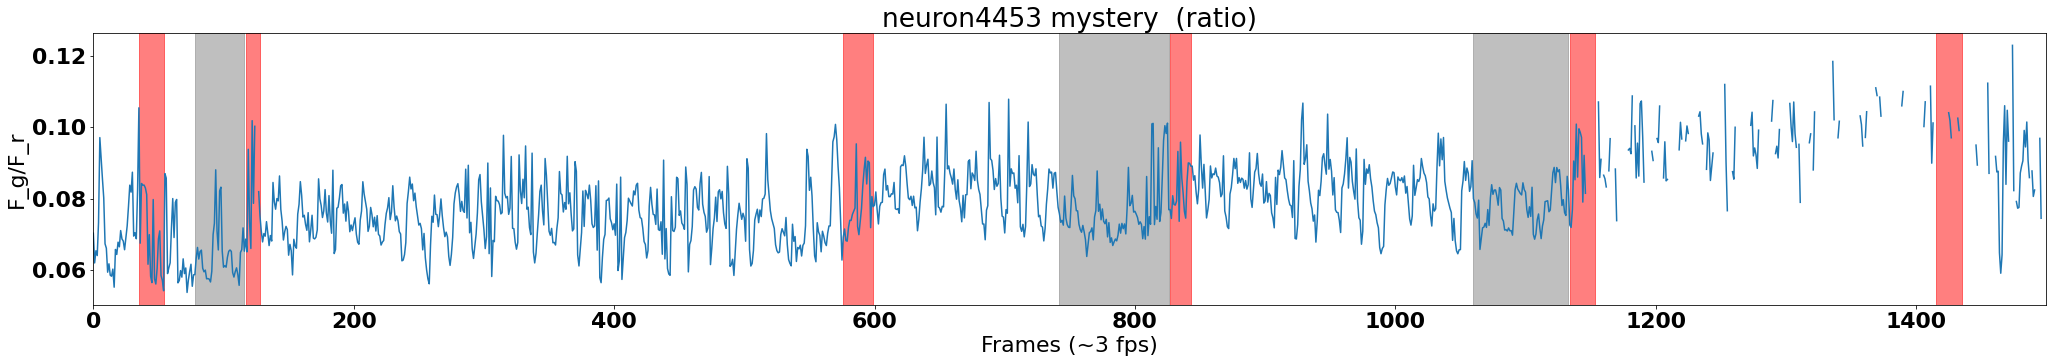

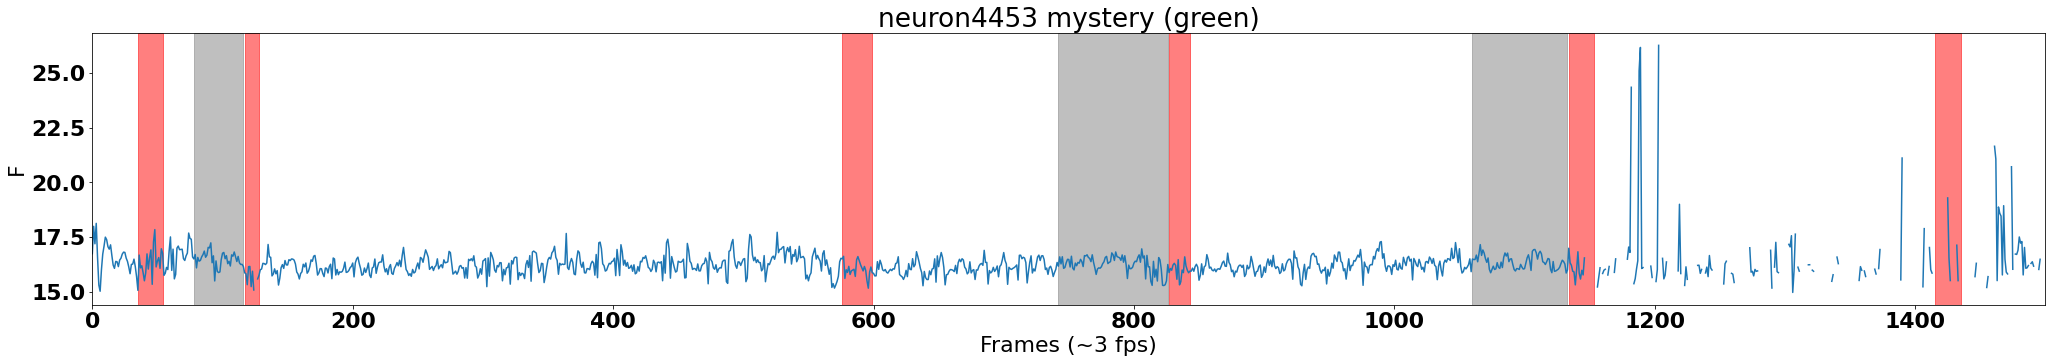

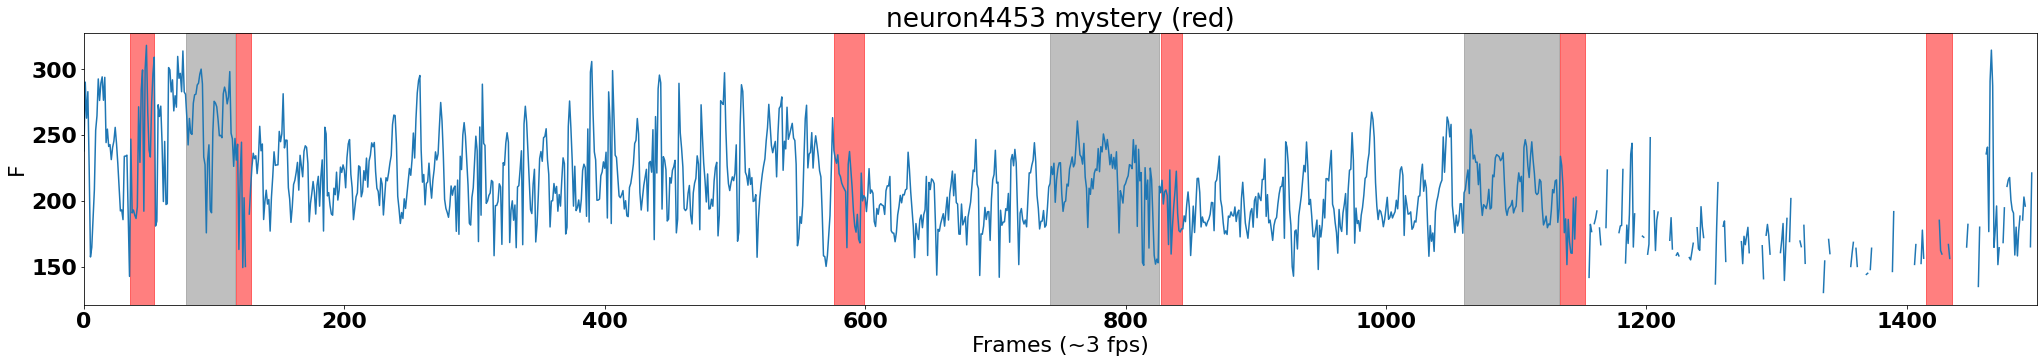

In [299]:
name = 'neuron4453'
neuron_id = 'mystery'
g = green_dat[name]
r = red_dat[name]

save_dir = os.path.join(project_dir, '4-traces', 'retracked_neurons')

plt.figure(figsize=(35,5))
plt.plot(g['brightness'] / r['brightness'])
plt.title(f"{name} {neuron_id}  (ratio)")
plt.xlim([0,1500])
plt.ylabel("F_g/F_r")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_ratio.png'))

plt.figure(figsize=(35,5))
plt.plot(g['brightness'] / g['volume'])
plt.title(f"{name} {neuron_id} (green)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_green.png'))

plt.figure(figsize=(35,5))
plt.plot(r['brightness'] / r['volume'])
plt.title(f"{name} {neuron_id} (red)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_red.png'))

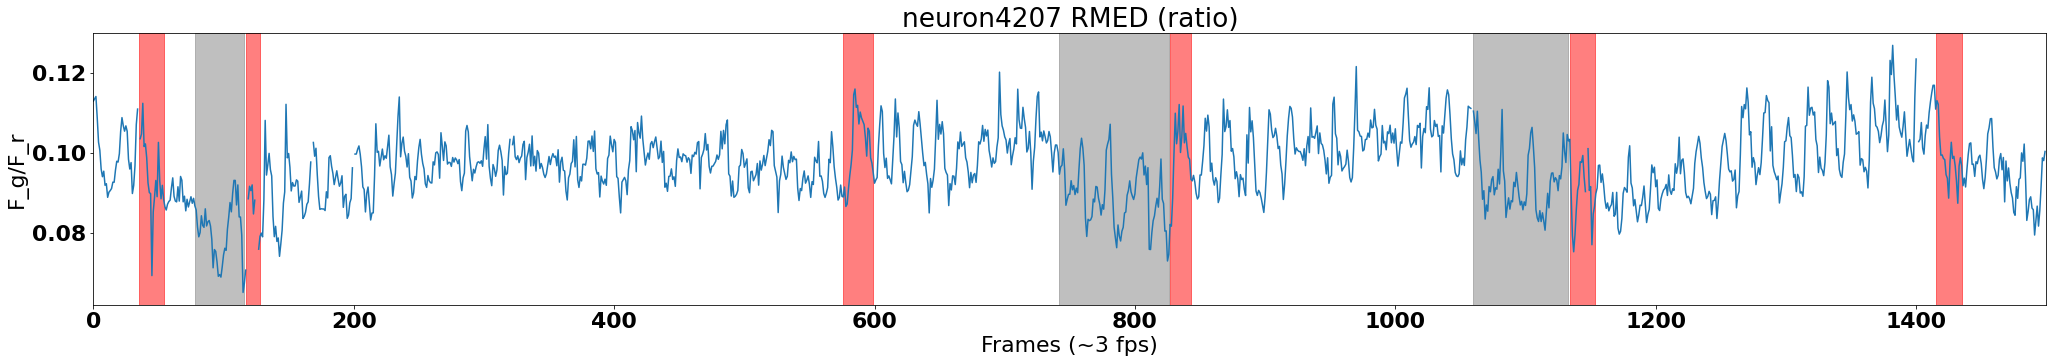

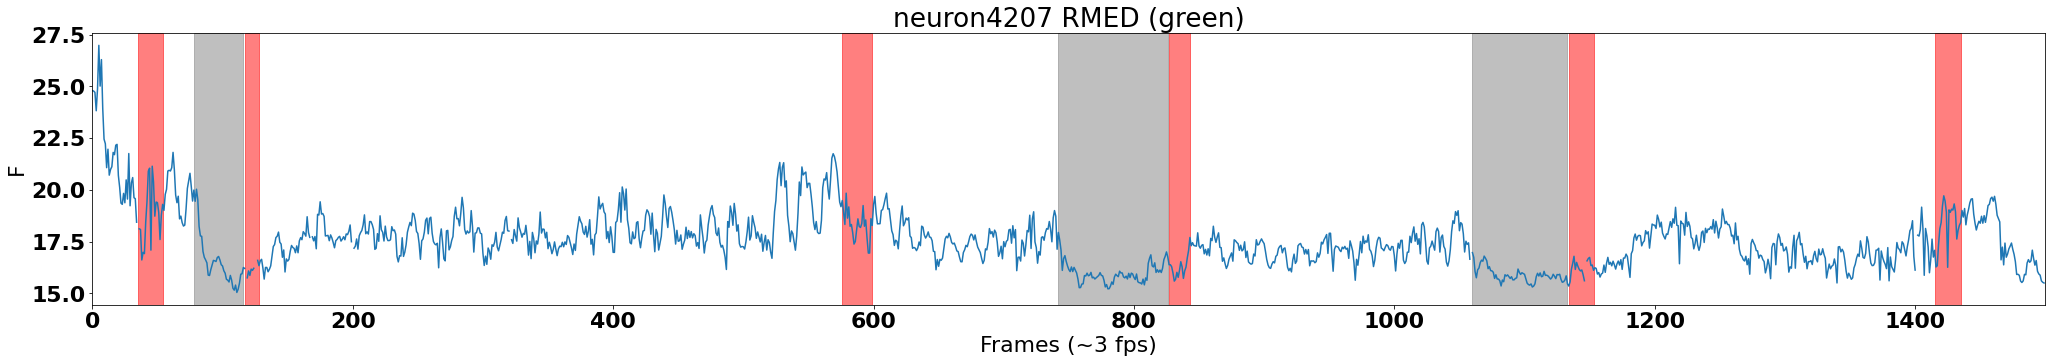

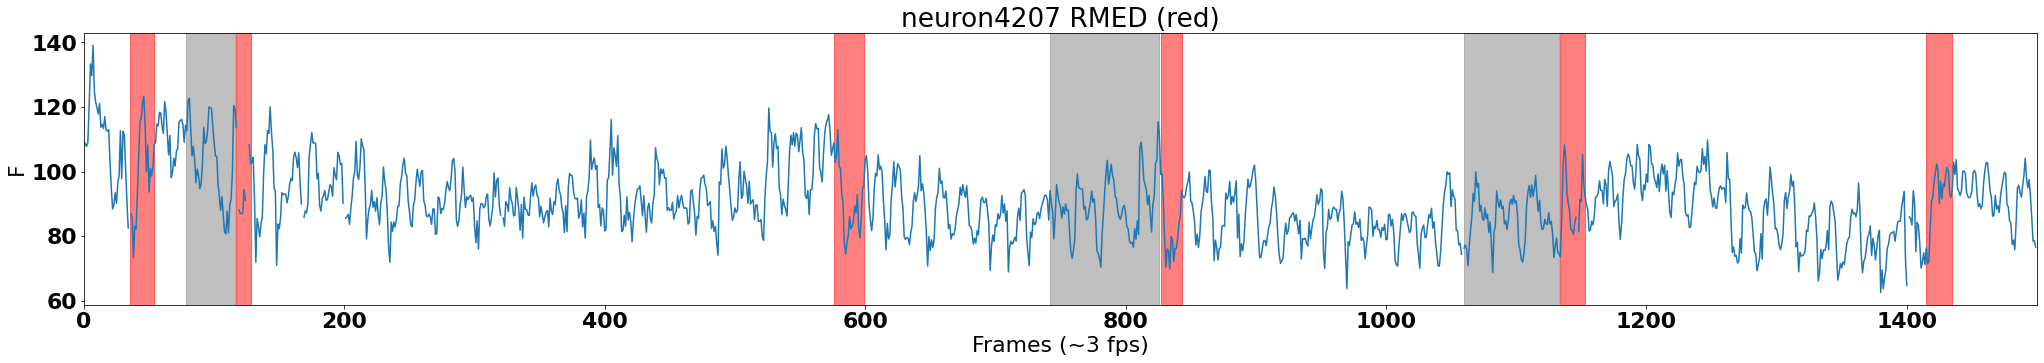

In [300]:
name = 'neuron4207'
neuron_id = 'RMED'
g = green_dat[name]
r = red_dat[name]

save_dir = os.path.join(project_dir, '4-traces', 'retracked_neurons')

plt.figure(figsize=(35,5))
plt.plot((g['brightness']-100) / (r['brightness']-100))
plt.title(f"{name} {neuron_id} (ratio)")
plt.xlim([0,1500])
plt.ylabel("F_g/F_r")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_ratio.png'))

plt.figure(figsize=(35,5))
plt.plot(g['brightness'] / g['volume'])
plt.title(f"{name} {neuron_id} (green)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_green.png'))

plt.figure(figsize=(35,5))
plt.plot(r['brightness'] / r['volume'] / 2)
plt.title(f"{name} {neuron_id} (red)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_red.png'))

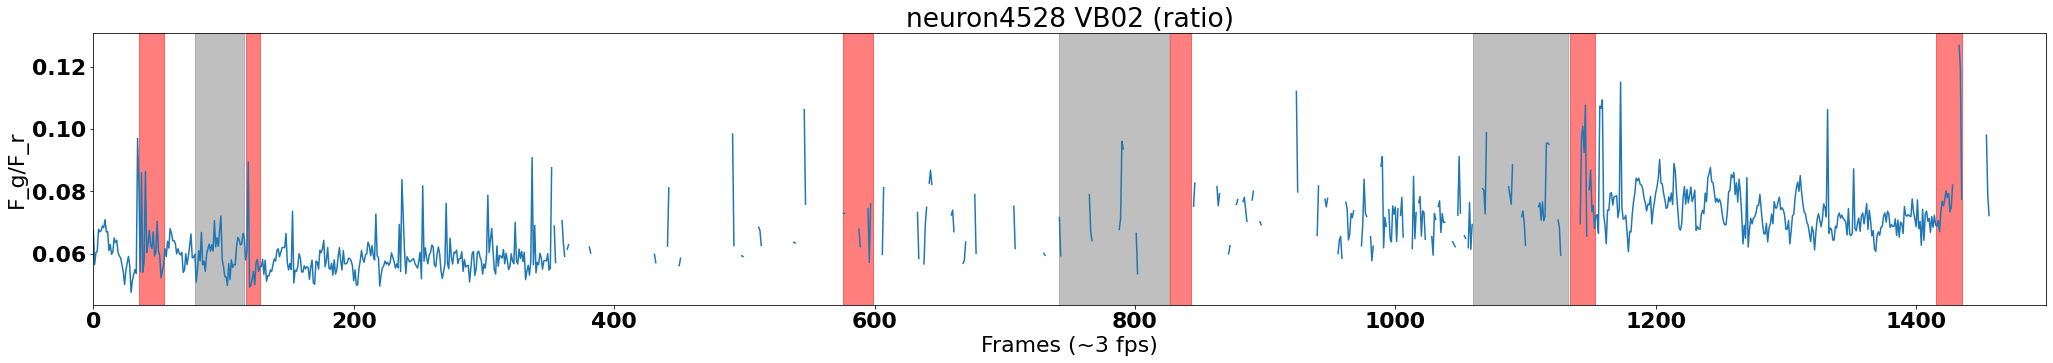

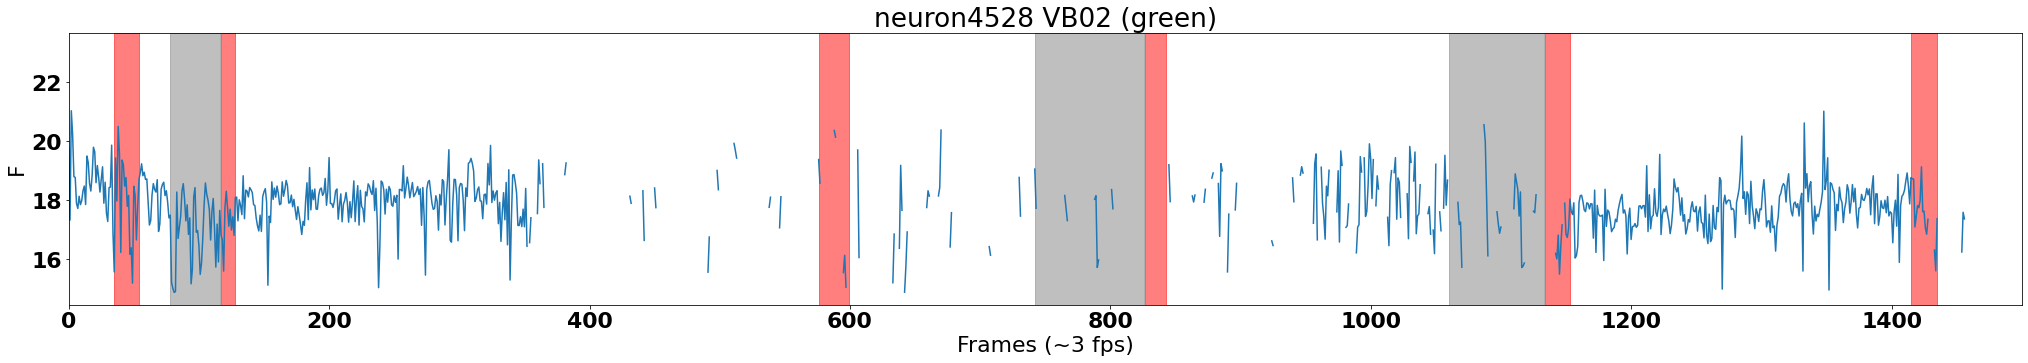

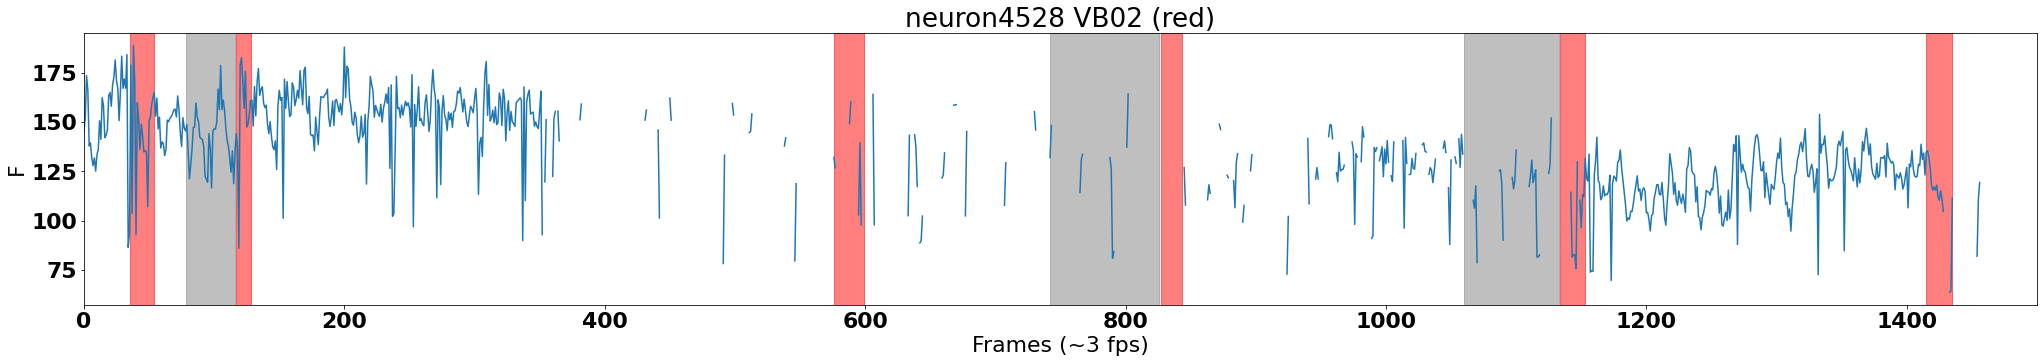

In [301]:
name = 'neuron4528'
neuron_id = 'VB02'
g = green_dat[name]
r = red_dat[name]

save_dir = os.path.join(project_dir, '4-traces', 'retracked_neurons')

plt.figure(figsize=(35,5))
plt.plot((g['brightness']-100) / (r['brightness']-100))
plt.title(f"{name} {neuron_id} (ratio)")
plt.xlim([0,1500])
plt.ylabel("F_g/F_r")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_ratio.png'))

plt.figure(figsize=(35,5))
plt.plot(g['brightness'] / g['volume'])
plt.title(f"{name} {neuron_id} (green)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_green.png'))

plt.figure(figsize=(35,5))
plt.plot(r['brightness'] / r['volume'] / 2)
plt.title(f"{name} {neuron_id} (red)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_red.png'))

# Attempts to denoise RMED trace

## ICA

In [116]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

In [347]:
name = 'neuron4207'
neuron_id = 'RMED'
g = green_dat[name]
r = red_dat[name]

background_per_pix = 14
g_trace = np.array(g['brightness']) - background_per_pix*np.array(g['volume'])
r_trace = np.array(r['brightness']) - background_per_pix*np.array(r['volume'])

ratio = g_trace / r_trace

# Deal with missing
missing_ind = np.where(np.isnan(g_trace))[0]
for i in missing_ind:
    g_trace[i] = 0.0
    r_trace[i] = 0.0
#     g_trace[i] = g_trace[i-1]
#     r_trace[i] = r_trace[i-1]


In [348]:
model = FastICA(n_components=2)
X_transformed = model.fit_transform(np.vstack([g_trace, r_trace]).T)

X_transformed[missing_ind, :] = np.nan
g_trace[missing_ind] = np.nan

In [349]:
model.components_

array([[ 2.82226512e-05, -6.00319699e-07],
       [-9.66564861e-06,  1.17018498e-06]])

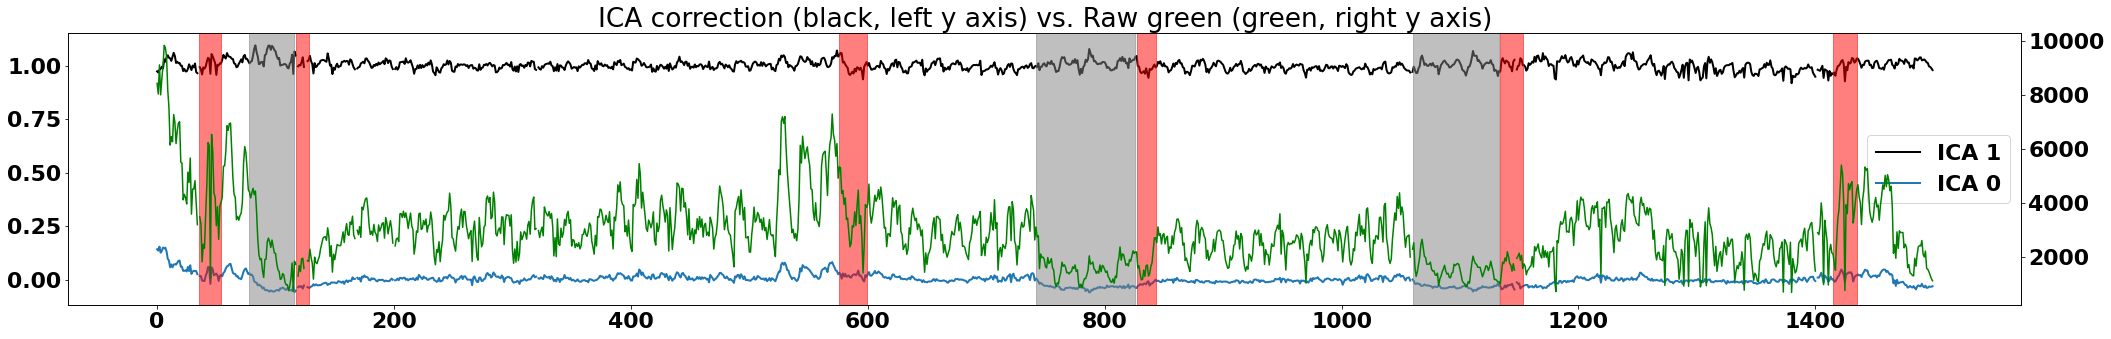

In [357]:
# plt.figure(figsize=(35,5))
fig, ax1 = plt.subplots(figsize=(35,5))
ax1.plot(1+X_transformed[:,1], 'k', label="ICA 1", linewidth=2)
ax1.plot(X_transformed[:,0], label="ICA 0", linewidth=2)
plt.legend()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(g_trace, 'g', label="Raw green trace")
shade_using_behavior(behavior_dat['Annotation'])
plt.title("ICA correction (black, left y axis) vs. Raw green (green, right y axis)")
plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_ICA.png'))

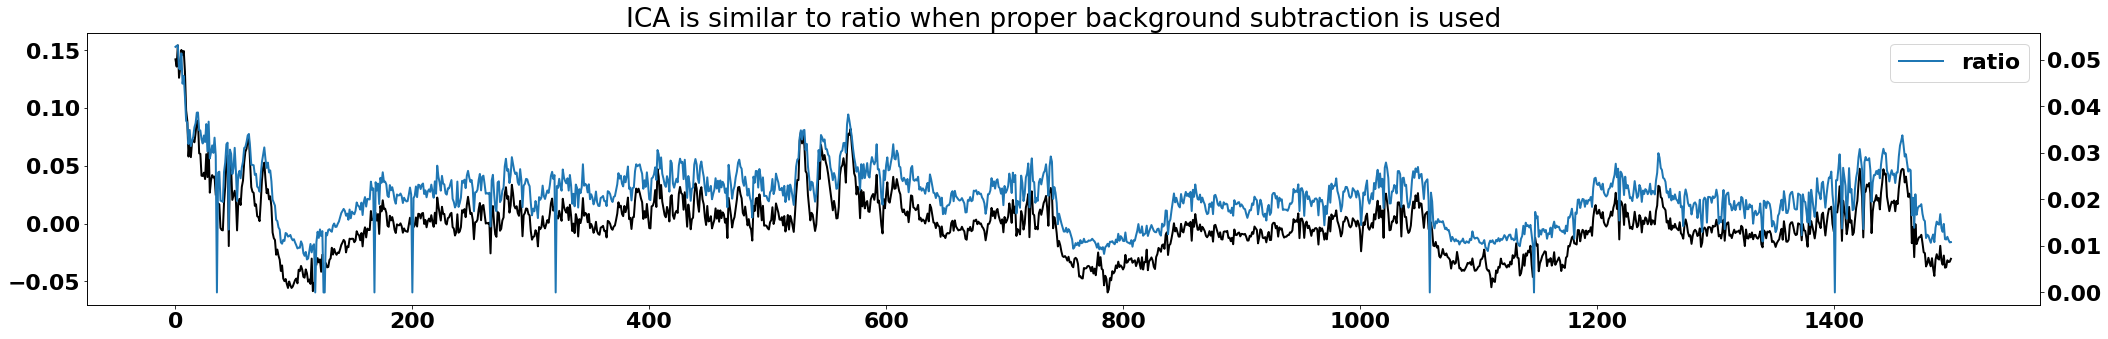

In [396]:
fig, ax1 = plt.subplots(figsize=(35,5))

ax1.plot(X_transformed[:,0], 'k', label="ICA 0", linewidth=2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(ratio, label="ratio", linewidth=2)
plt.legend()
plt.title("ICA is similar to ratio when proper background subtraction is used");

# Correlation between two red channels

In [71]:
name = 'neuron4207'
r = red_dat[name]

r_trace2 = np.array(r['brightness'] / r['volume'])

name = 'neuron4453'
r = red_dat[name]

r_trace1 = np.array(r['brightness'] / r['volume'])

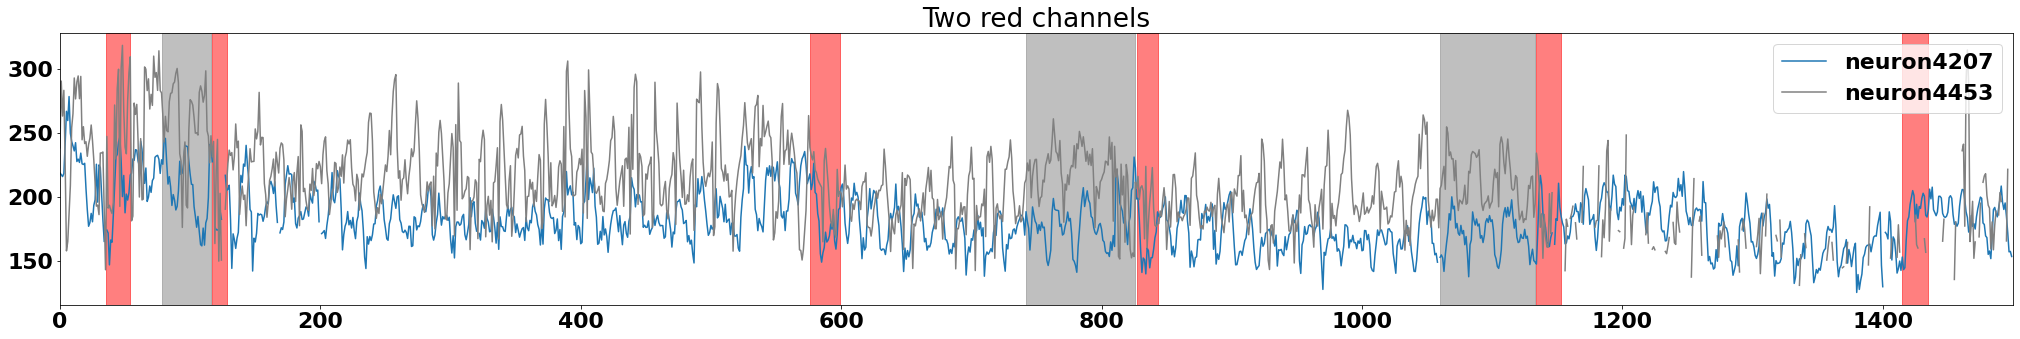

In [72]:
plt.figure(figsize=(35,5))
plt.plot(r_trace2, label='neuron4207')
plt.plot(r_trace1, 'gray', label='neuron4453')
plt.title(f"Two red channels")
plt.xlim([0,1500])
plt.legend(loc='upper right')
shade_using_behavior(behavior_dat['Annotation'])

In [199]:
from scipy.stats import pearsonr

In [201]:

# Deal with missing
missing_ind = np.where(np.isnan(r_trace1))[0]
for i in missing_ind:
    r_trace1[i] = 0.0
missing_ind = np.where(np.isnan(r_trace2))[0]
for i in missing_ind:
    r_trace2[i] = 0.0
    
pearsonr(r_trace1, r_trace2)

(0.18064449890889794, 1.8077608727960801e-12)

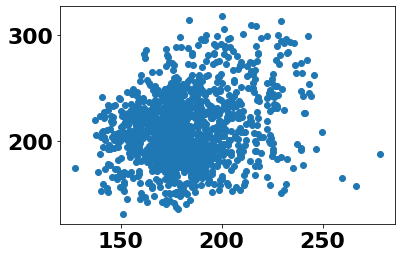

In [74]:
plt.plot(r_trace2, r_trace1, 'o')

# Look at quantiles

In [33]:
# Quantile-based traces
def get_quantile_val(pixel_vals, quantile=0.5, back_per_pix=0.0):
    # Can work with n-dimensional vals_from_frame
    thresh = np.quantile(pixel_vals, quantile)
    submask = pixel_vals>thresh

    return np.mean(pixel_vals[submask]) - back_per_pix

In [34]:
name = 'neuron4207'
quantile = 0.5
neuron_id = f'RMED_quantile_{int(quantile*100)}'
g = green_dat[name]
r = red_dat[name]

g_tmp = list(g['all_values'])
g_trace = np.zeros(len(g))
for i in range(len(g)):
    v = g_tmp[i]
    if np.isscalar(v):
        continue
    g_trace[i] = get_quantile_val(v, quantile=quantile)
    
r_tmp = list(r['all_values'])
r_trace = np.zeros(len(r))
for i in range(len(r)):
    v = r_tmp[i]
    try:
        v = v[0]
    except:
        continue
    if np.isscalar(v):
        continue
    r_trace[i] = get_quantile_val(v, quantile=quantile)

In [35]:
r_trace[r_trace==0] = np.nan
g_trace[g_trace==0] = np.nan

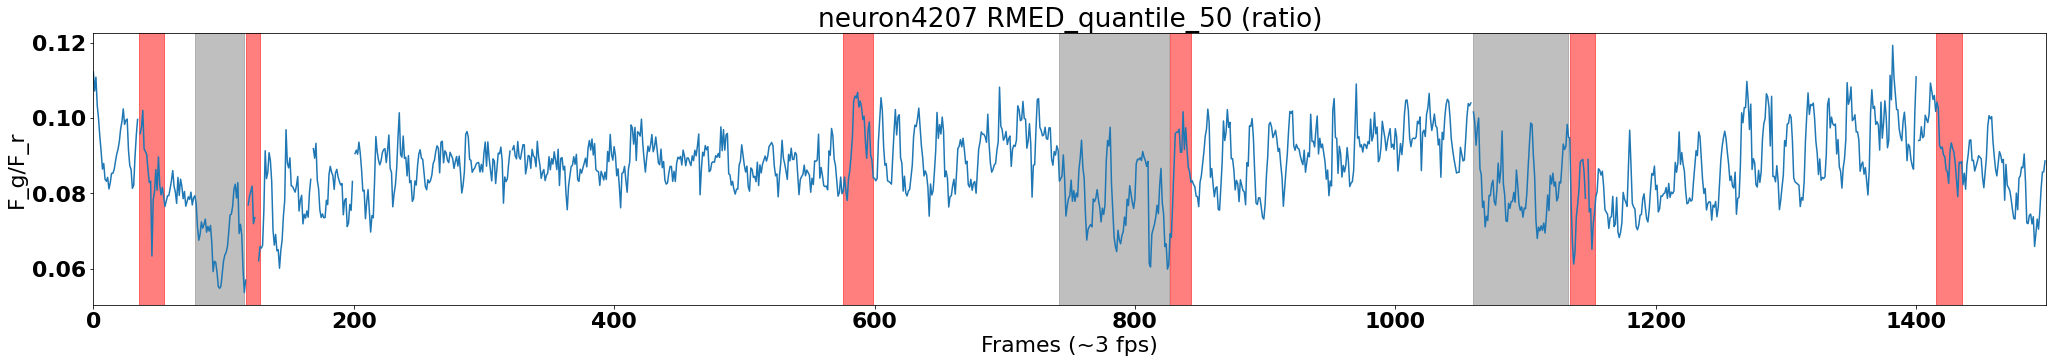

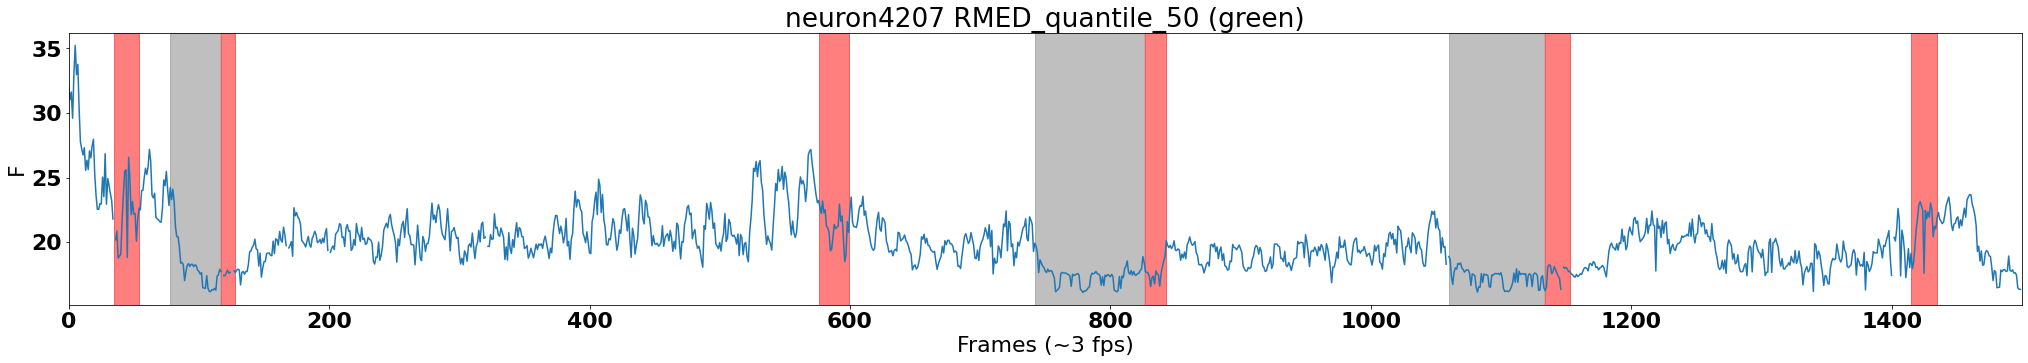

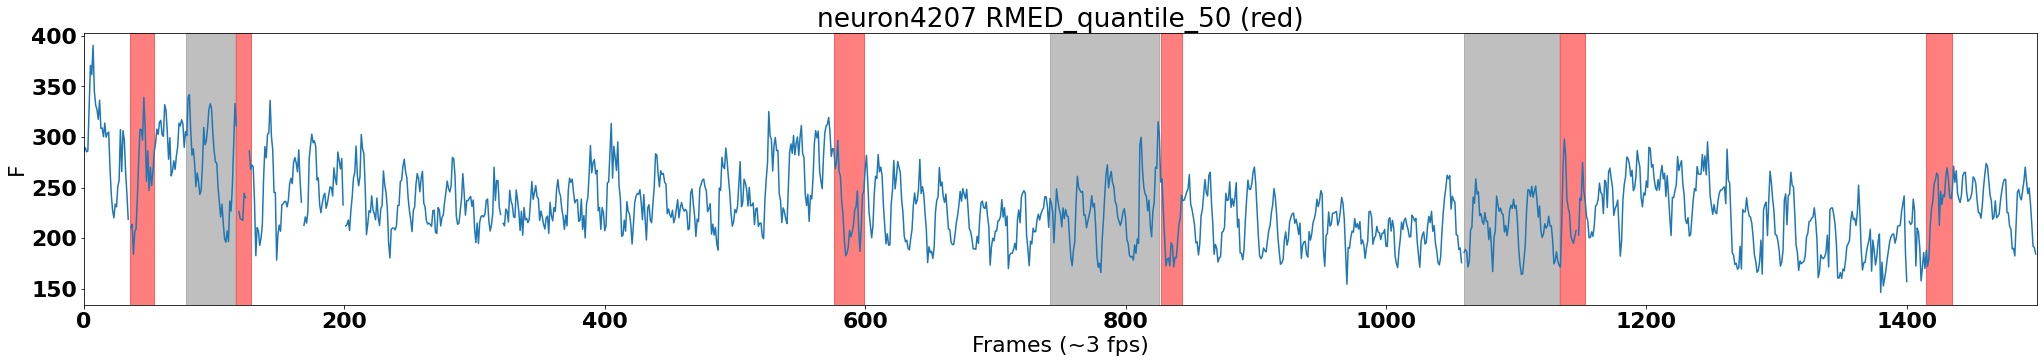

In [36]:
save_dir = os.path.join(project_dir, '4-traces', 'retracked_neurons')

plt.figure(figsize=(35,5))
plt.plot((g_trace) / (r_trace))
plt.title(f"{name} {neuron_id} (ratio)")
plt.xlim([0,1500])
plt.ylabel("F_g/F_r")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_ratio.png'))

plt.figure(figsize=(35,5))
plt.plot(g_trace)
plt.title(f"{name} {neuron_id} (green)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_green.png'))

plt.figure(figsize=(35,5))
plt.plot(r_trace)
plt.title(f"{name} {neuron_id} (red)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_red.png'))

# Look at sums, not averages

In [46]:
from ipywidgets import interact

name = 'neuron4207'
neuron_id = 'RMED'
g = green_dat[name]
r = red_dat[name]

In [47]:
g

data  brightness  volume                                         all_values  \
0        19343.0   780.0  [15, 18, 16, 15, 15, 15, 18, 16, 16, 15, 16, 1...   
1        18458.0   745.0  [17, 18, 18, 19, 18, 17, 17, 16, 18, 21, 19, 1...   
2        21005.0   850.0  [16, 16, 16, 16, 17, 17, 17, 17, 18, 16, 17, 1...   
3        19393.0   814.0  [18, 19, 17, 19, 19, 21, 18, 18, 18, 19, 21, 1...   
4        19640.0   789.0  [21, 21, 21, 21, 24, 23, 27, 31, 21, 24, 28, 3...   
...          ...     ...                                                ...   
1495     12723.0   798.0  [15, 15, 15, 15, 15, 14, 15, 15, 15, 15, 15, 1...   
1496     12264.0   772.0  [15, 16, 15, 14, 14, 14, 15, 14, 14, 14, 15, 1...   
1497     12956.0   830.0  [14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1...   
1498     12169.0   783.0  [14, 15, 14, 14, 18, 16, 15, 15, 15, 15, 15, 1...   
1499     11599.0   748.0  [15, 16, 15, 15, 15, 15, 15, 15, 15, 15, 17, 1...   

data  centroid_ind      z_seg       x_seg       y_seg  z_dlc       x_dlc  \
0             98.0  17.078205  317.747436  315.374359   19.0  319.562866   
1             69.0  16.139597  268.308725  301.004027   19.0  270.278938   
2             77.0  16.887059  267.202353  301.932941   19.0  268.391930   
3             46.0  17.036855  259.918919  295.783784   19.0  262.084564   
4             70.0  18.742712  301.733840  310.214195   19.0  301.541928   
...            ...        ...         ...         ...    ...         ...   
1495          20.0  17.402256  258.479950  479.570175   19.0  257.936302   
1496          50.0  16.784974  239.379534  479.347150   19.0  238.500854   
1497          46.0  16.898795  230.285542  479.674699   19.0  230.116035   
1498          75.0  17.365262  224.357599  476.431673   19.0  224.152035   
1499          63.0  17.708556  226.283422  468.243316   19.0  226.388126   

data       y_dlc  match_confidence  
0     315.573273          0.163861  
1     301.901711          0.112514  
2     302.897369          0.152155  
3     297.049362          0.154959  
4     311.935009          0.483468  
...          ...               ...  
1495  480.585426          0.200117  
1496  479.647552          0.147945  
1497  480.584595          0.155680  
1498  477.998238          0.191682  
1499  469.499985          0.240623  

[1500 rows x 11 columns]

In [48]:
save_dir = os.path.join(project_dir, '4-traces', 'retracked_neurons')

# quantile = 0.5

def plot_variable_background(bg, br, bleed_to_red):

    g_trace = np.array(g['brightness']) - bg*np.array(g['volume'])
    r_trace = (np.array(r['brightness']) - br*np.array(r['volume'])) - bleed_to_red*np.array(g['brightness'])
#     g_trace = np.array(get_quantile_val(g['all_values'], quantile=quantile, back_per_pix=b))
#     r_trace = np.array(get_quantile_val(r['all_values'], quantile=quantile, back_per_pix=b))

    # Deal with missing
    missing_ind = np.where(np.isnan(g_trace))[0]
    for i in missing_ind:
        g_trace[i] = 0.0
        r_trace[i] = 0.0

    r_trace[r_trace==0] = np.nan
    g_trace[g_trace==0] = np.nan

    plt.figure(figsize=(35,5))
    plt.plot((g_trace) / (r_trace))
    plt.title(f"{name} {neuron_id} (ratio)")
    plt.xlim([0,1500])
    plt.ylabel("F_g/F_r")
    plt.xlabel("Frames (~3 fps)")
    shade_using_behavior(behavior_dat['Annotation'])
    # plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_ratio.png'))

    plt.figure(figsize=(35,5))
    plt.plot(g_trace)
    plt.title(f"{name} {neuron_id} (green)")
    plt.xlim([0,1500])
    plt.ylabel("F")
    plt.xlabel("Frames (~3 fps)")
    shade_using_behavior(behavior_dat['Annotation'])
    # plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_green.png'))

    plt.figure(figsize=(35,5))
    plt.plot(r_trace)
    plt.title(f"{name} {neuron_id} (red)")
    plt.xlim([0,1500])
    plt.ylabel("F")
    plt.xlabel("Frames (~3 fps)")
    shade_using_behavior(behavior_dat['Annotation'])
    # plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_red.png'))

interact(plot_variable_background, br=(0,20), bg=(0,20), bleed_to_red=(0,100))

interactive(children=(IntSlider(value=10, description='bg', max=20), IntSlider(value=10, description='br', max…

<function __main__.plot_variable_background(bg, br, bleed_to_red)>

Text(0.5, 1.0, 'Size of volume')

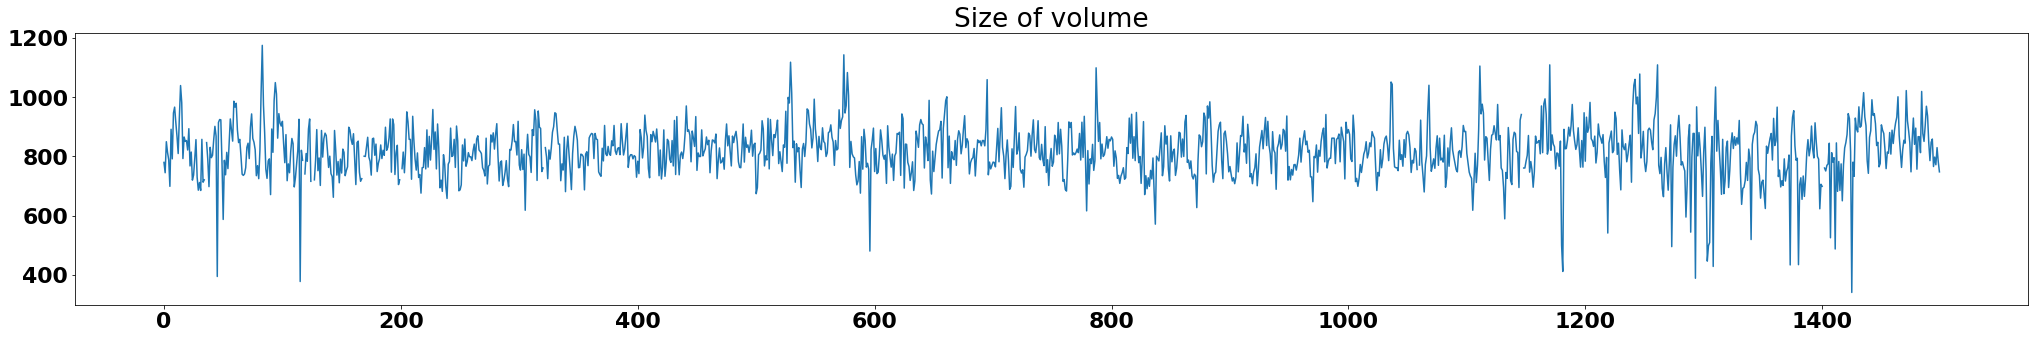

In [604]:
plt.figure(figsize=(35,5))
plt.plot(g['volume'])
plt.title("Size of volume")

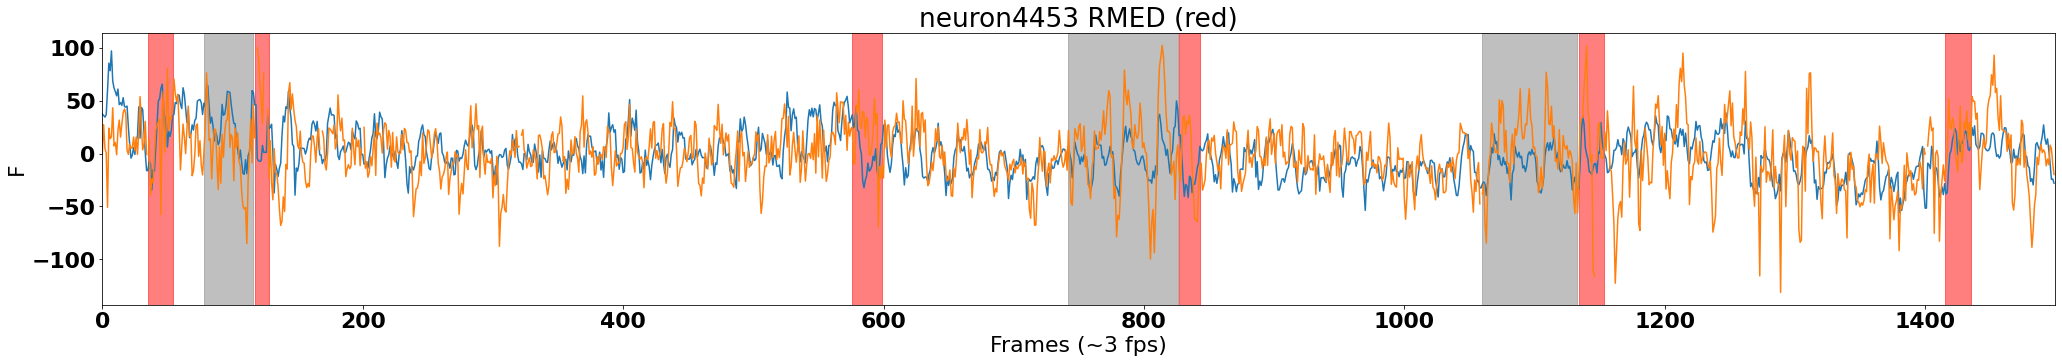

In [87]:
plt.figure(figsize=(35,5))

plt.plot(r_trace)
plt.title(f"{name} {neuron_id} (red)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
shade_using_behavior(behavior_dat['Annotation'])

z_normalized = -(g['z_seg'] - np.mean(g['z_seg']))*30
plt.plot(z_normalized)

In [90]:
from scipy.stats import pearsonr

# Deal with missing
missing_ind = np.where(np.isnan(r_trace))[0]
for i in missing_ind:
    r_trace[i] = 0.0
missing_ind = np.where(np.isnan(z_normalized))[0]
for i in missing_ind:
    z_normalized[i] = 0.0
    
pearsonr(r_trace, z_normalized)

(0.38466326815651425, 4.3619584961871715e-54)

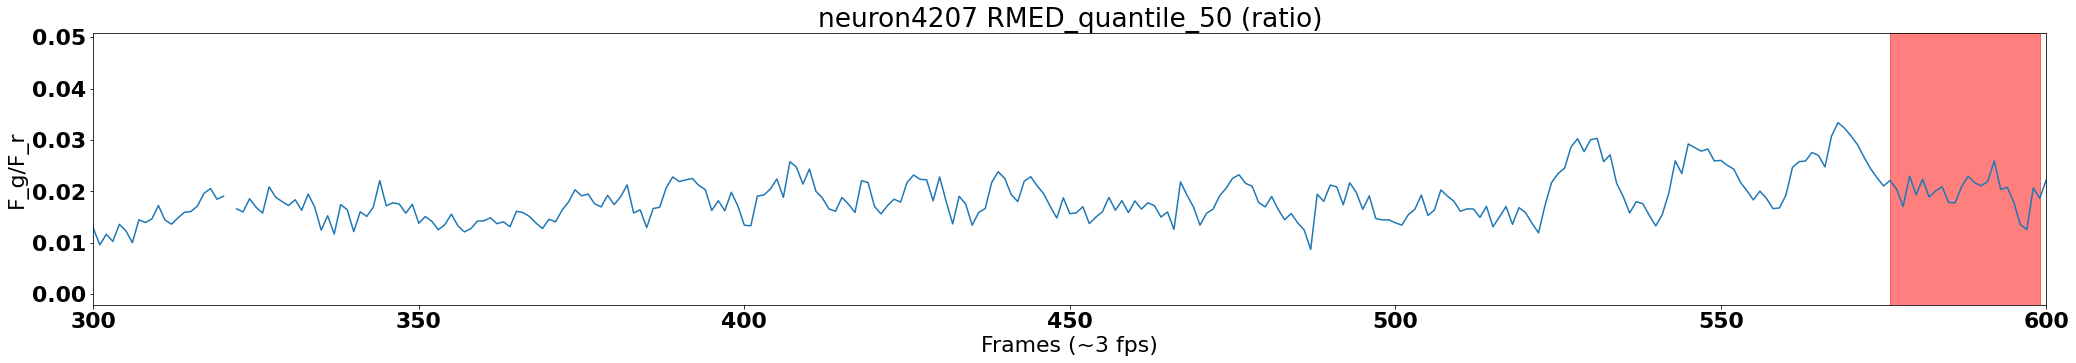

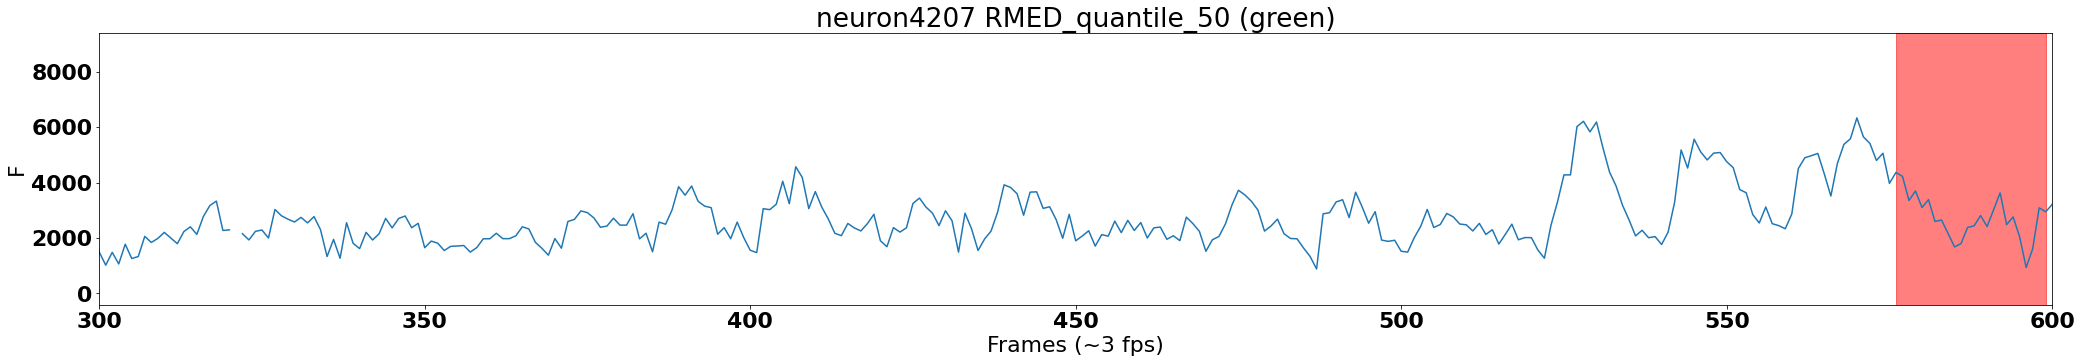

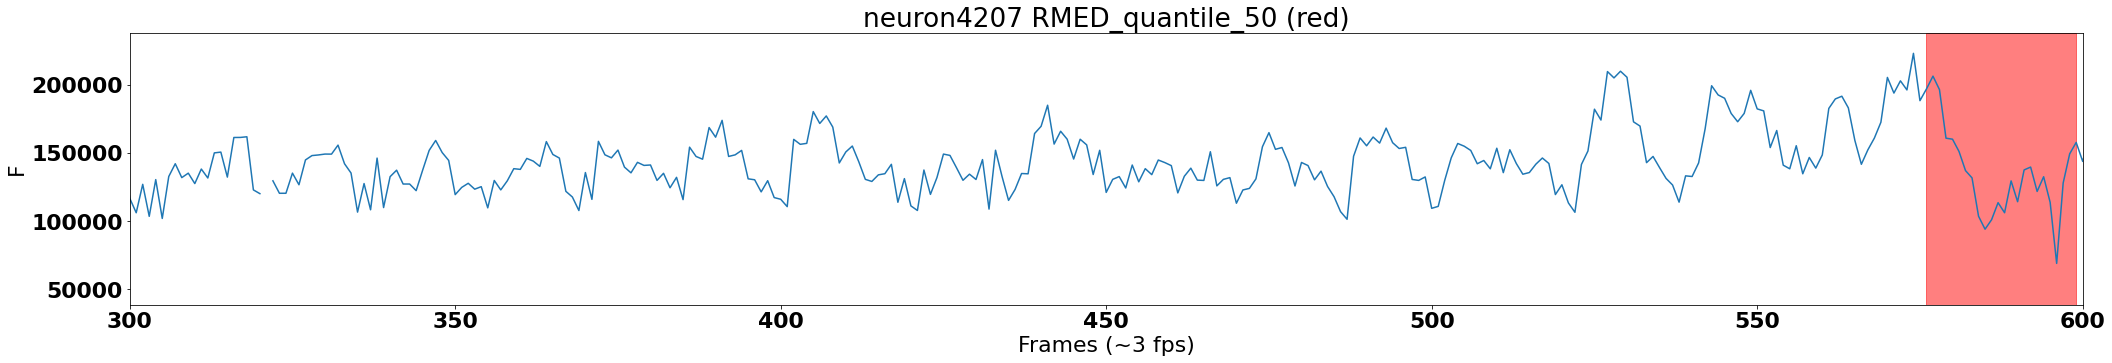

In [54]:

background_per_pix = 15
g_trace = np.array(g['brightness']) - background_per_pix*np.array(g['volume'])
r_trace = np.array(r['brightness']) - background_per_pix*np.array(r['volume'])
    
plt.figure(figsize=(35,5))
plt.plot((g_trace) / (r_trace))
plt.title(f"{name} {neuron_id} (ratio)")
plt.xlim([0,1500])
plt.ylabel("F_g/F_r")
plt.xlabel("Frames (~3 fps)")
plt.xlim([300,600])
shade_using_behavior(behavior_dat['Annotation'])
    
plt.figure(figsize=(35,5))
plt.plot(g_trace)
plt.title(f"{name} {neuron_id} (green)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
plt.xlim([300,600])
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_green.png'))

plt.figure(figsize=(35,5))
plt.plot(r_trace)
plt.title(f"{name} {neuron_id} (red)")
plt.xlim([0,1500])
plt.ylabel("F")
plt.xlabel("Frames (~3 fps)")
plt.xlim([300,600])
shade_using_behavior(behavior_dat['Annotation'])
# plt.savefig(os.path.join(save_dir, f'{name}_{neuron_id}_red.png'))

# Scratch

## More ICA

In [187]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

In [398]:
name = 'neuron4207'
neuron_id = 'RMED'
g = green_dat[name]
r = red_dat[name]

bg, br = 13, 13
g_trace = np.array(g['brightness']) - bg*np.array(g['volume'])
r_trace = (np.array(r['brightness']) - br*np.array(r['volume']))
ratio_trace = g_trace / r_trace
# g_trace = np.array(g['brightness'] / g['volume'])
# r_trace = np.array(r['brightness'] / r['volume'])

# background = 90
# g_trace, r_trace = g_trace-background, r_trace-background

# Deal with missing
missing_ind = np.where(np.isnan(g_trace))[0]
for i in missing_ind:
    g_trace[i] = 0.0
    r_trace[i] = 0.0
    ratio_trace[i] = 0.0
#     g_trace[i] = g_trace[i-1]
#     r_trace[i] = r_trace[i-1]

# missing_ind = np.where(np.isnan(g_trace))[0]
# for i in missing_ind:
#     g_trace[i] = 0.0
#     r_trace[i] = 0.0

In [399]:
model = FastICA(n_components=3, whiten=True)
X_transformed = model.fit_transform(np.vstack([g_trace, r_trace, ratio_trace]).T)

X_transformed[missing_ind, :] = np.nan
g_trace[missing_ind] = np.nan

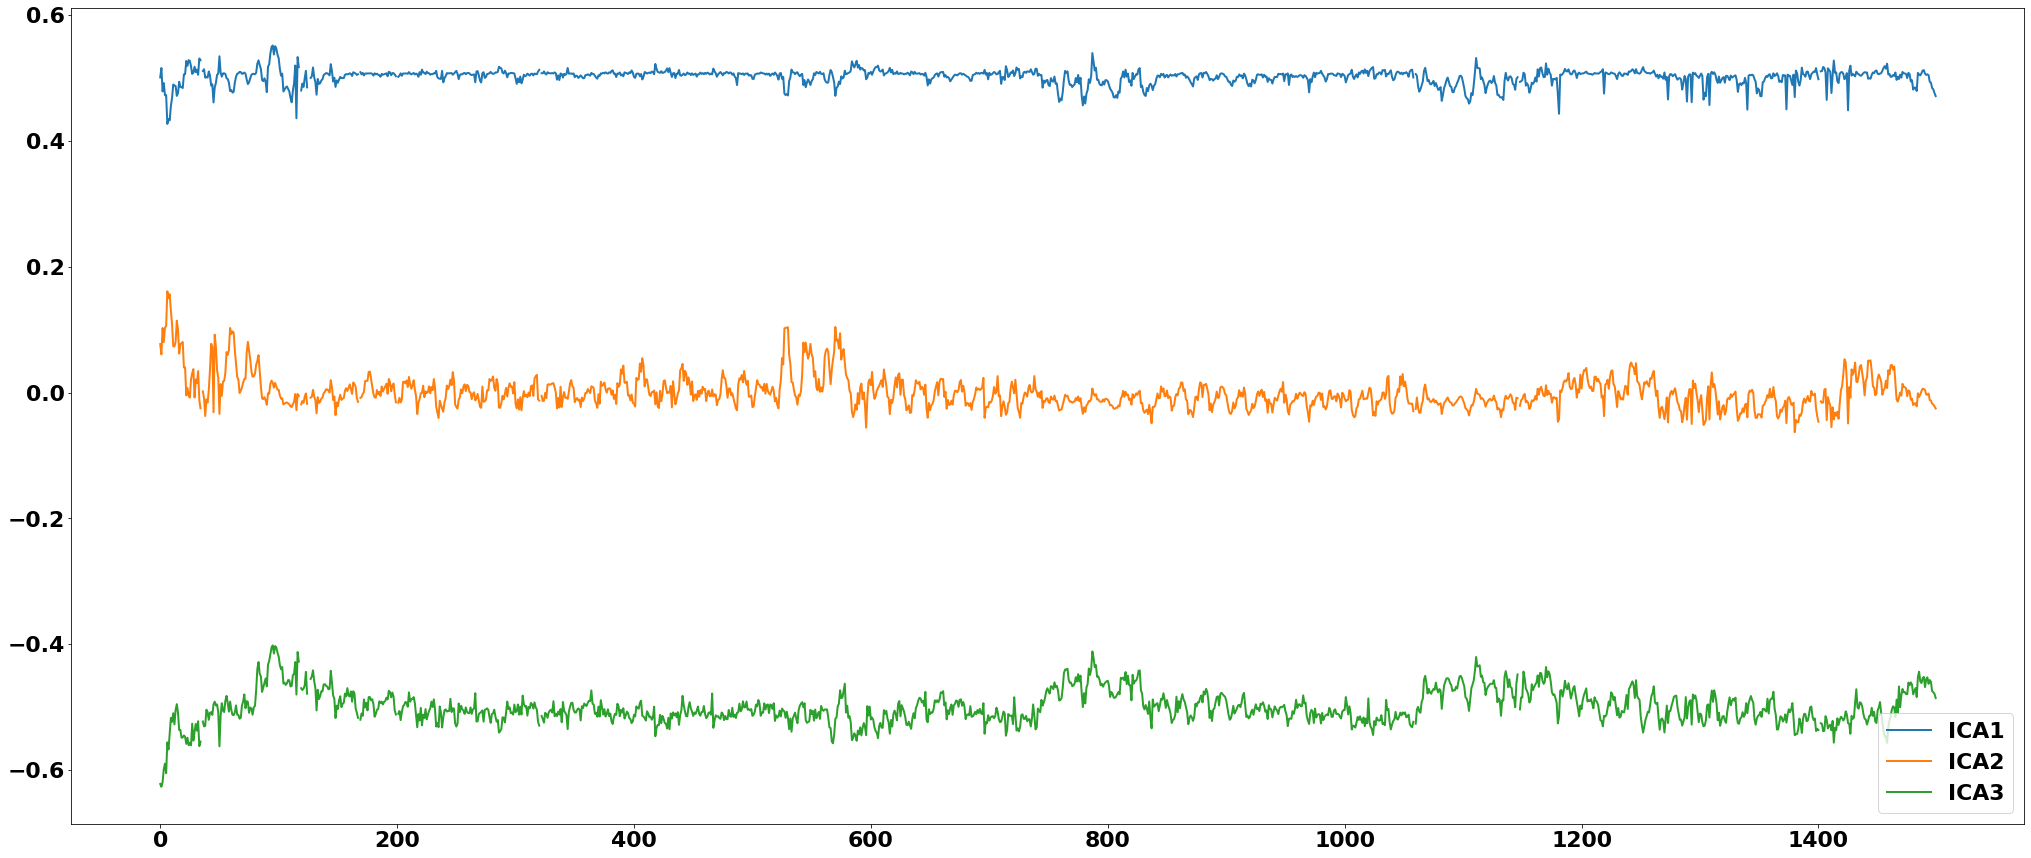

In [400]:

fig, ax1 = plt.subplots(figsize=(35,15))
ax1.plot(X_transformed[:,0]+0.5, label="ICA1", linewidth=2)
ax1.plot(X_transformed[:,1], label="ICA2", linewidth=2)
ax1.plot(X_transformed[:,2]-0.5, label="ICA3", linewidth=2)
plt.legend()

# Power spectrum of red

In [709]:
name = 'neuron4207'
neuron_id = 'RMED'
g = green_dat[name]
r = red_dat[name]

bg, br = 13, 13
g_trace_with_nan = np.array(g['brightness']) - bg*np.array(g['volume'])
r_trace_with_nan = (np.array(r['brightness']) - br*np.array(r['volume']))

g_trace = g_trace_with_nan.copy()
r_trace = r_trace_with_nan.copy()

# Deal with missing
missing_ind = np.where(np.isnan(g_trace_with_nan))[0]
for i in missing_ind:
#     g_trace[i] = 0.0
#     r_trace[i] = 0.0
    g_trace[i] = g_trace[i-1]
    r_trace[i] = r_trace[i-1]

r_trace -= np.mean(r_trace)

(0.0, 0.5)

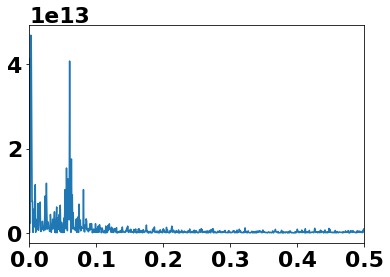

In [710]:
ps = np.abs(np.fft.fft(r_trace))**2

sample_freq = 1
time_step = 1 / sample_freq
freqs = np.fft.fftfreq(r_trace.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])
plt.xlim([0, 0.5])

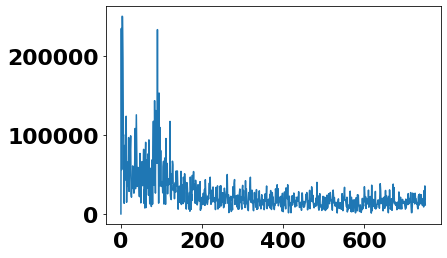

In [711]:
from scipy.signal import periodogram
f, Pxx_spec = scipy.signal.periodogram(r_trace, fs=1.0);
plt.plot(np.sqrt(Pxx_spec));

In [712]:
from scipy.signal import iirnotch, filtfilt

# Remove spike at zero
start_freq = 50
i_max_freq = np.argmax(Pxx_spec[start_freq:]) + start_freq
max_freq = freqs[i_max_freq]
print(max_freq, 1/max_freq)

# Filter that frequency
Q = 0.5 # Quality factor
b, a = iirnotch(max_freq, Q, 1)

# Apply
r_filtered = filtfilt(b, a, r_trace)

0.06 16.666666666666668


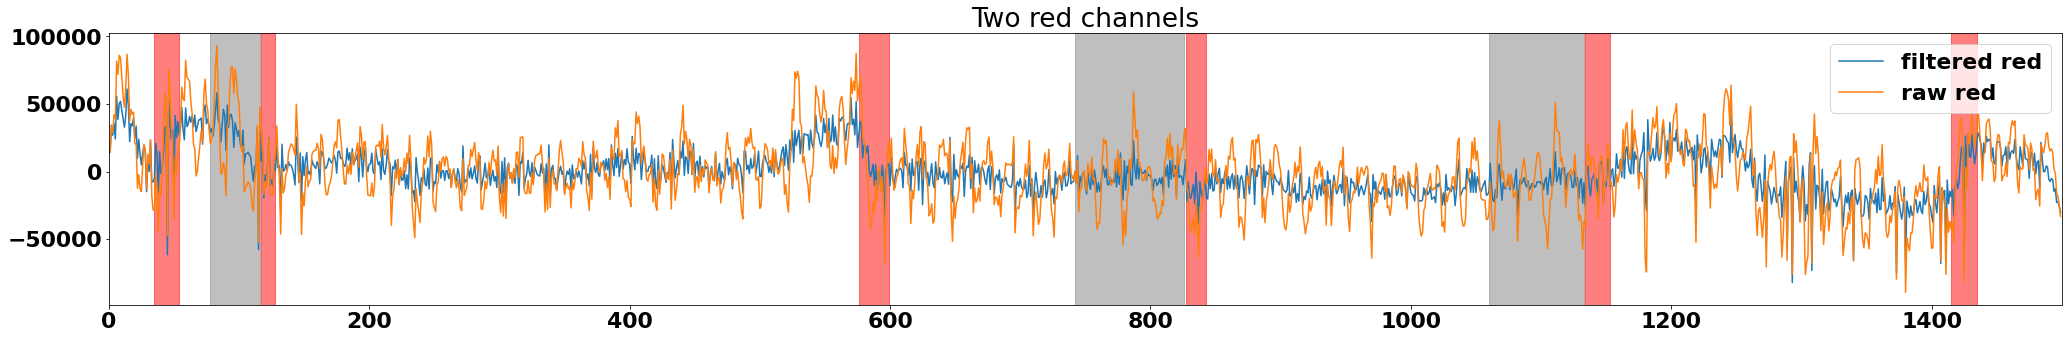

In [713]:
plt.figure(figsize=(35,5))
plt.plot(r_filtered, label='filtered red')
plt.plot(r_trace, label='raw red')
plt.title(f"Two red channels")
plt.xlim([0,1500])
plt.legend(loc='upper right')
shade_using_behavior(behavior_dat['Annotation'])

## Apply smoothing windows to better resolve the power spectrum

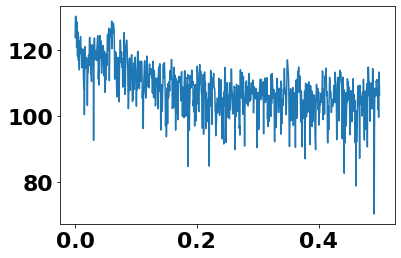

In [714]:
from scipy.signal import get_window

m = len(r_trace)
n = 2048
t = np.arange(0, m)
window = get_window('hamming', m)
w = np.fft.rfft(r_trace * window, n=n)
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
decibels = 20*np.log10(np.abs(w))

plt.plot(freqs, decibels)
# plt.ylim(-60, 60)
# plt.xlim(0, 20)

In [715]:

start_freq = 10
i_max_freq = np.argmax(decibels[start_freq:]) + start_freq
max_freq = freqs[i_max_freq]
print("Max freq and max period")
print(max_freq, 1/max_freq)

Max freq and max period
0.06005859375 16.650406504065042


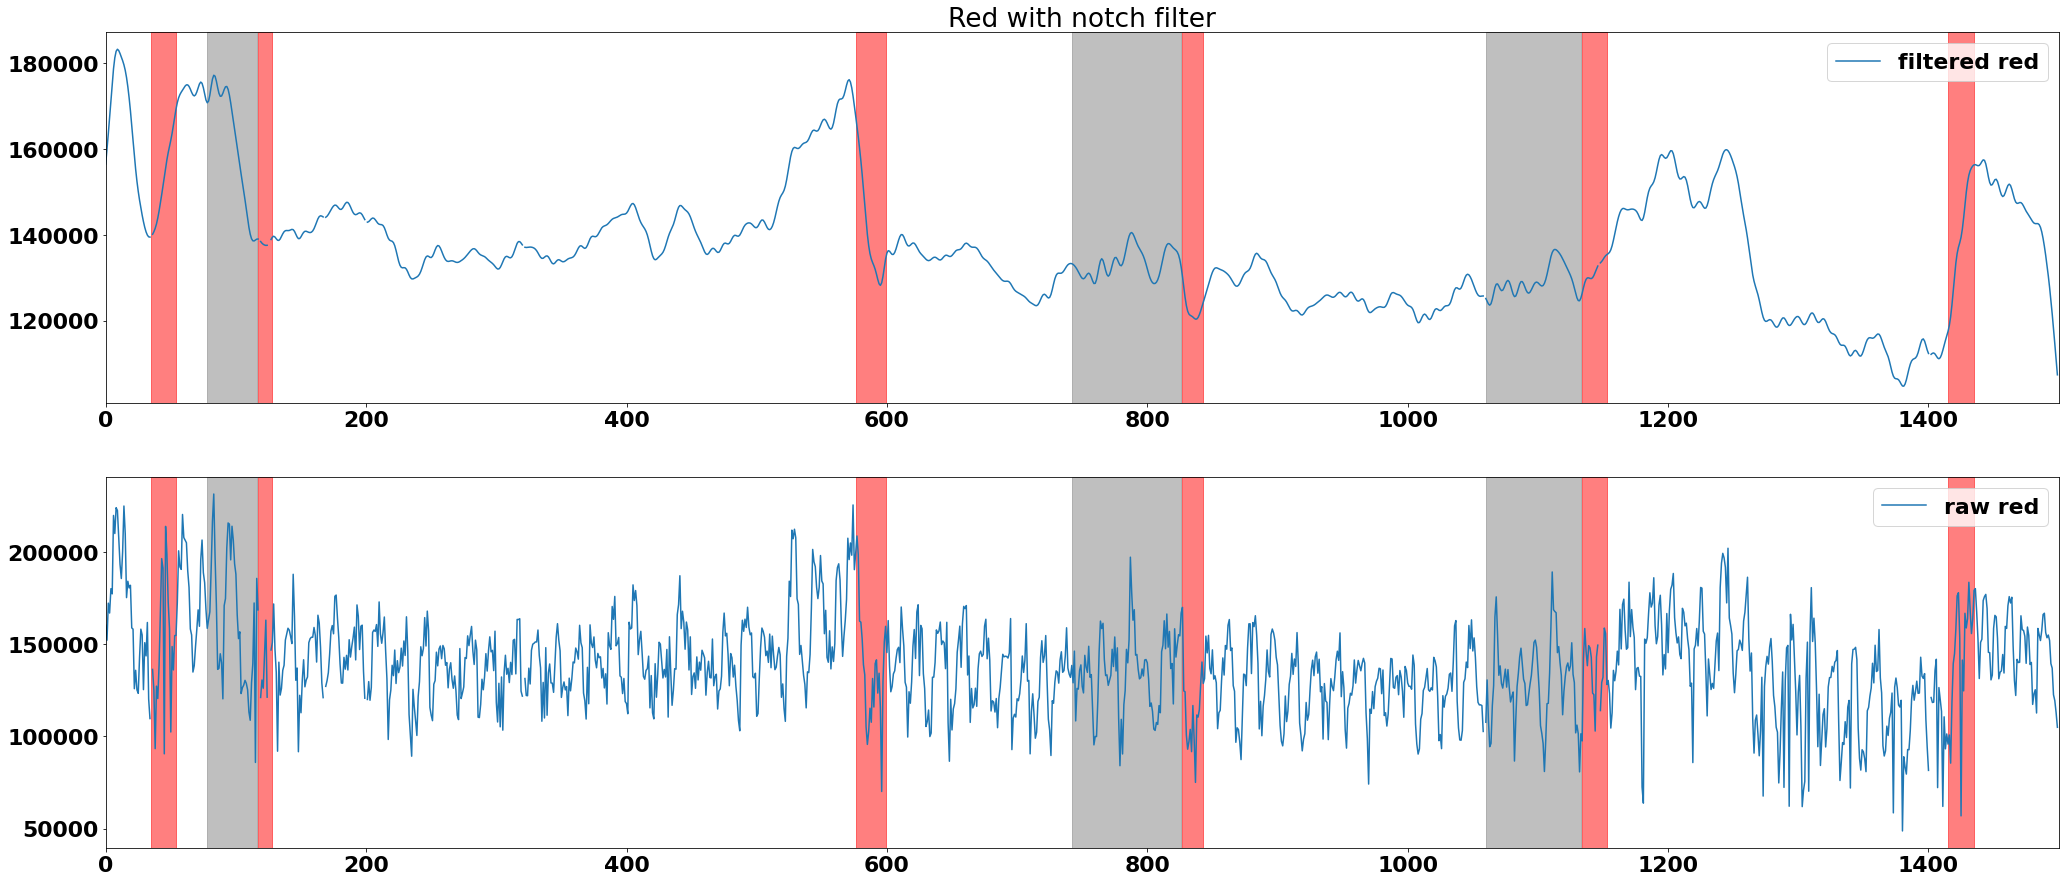

In [758]:
from scipy.signal import iirnotch, filtfilt, butter

# Filter that frequency
Q = 0.5 # Quality factor
b, a = iirnotch(max_freq, Q, 1)

# Also use a low-pass filter
b2, a2 = butter(4, 0.2, 'low')

# Apply
r_filtered = filtfilt(b, a, r_trace)
r_filtered = filtfilt(b2, a2, r_filtered)
r_filtered_with_nan = r_filtered.copy()

# Add missing back in
for i in missing_ind:
    r_filtered_with_nan[i] = np.nan

plt.figure(figsize=(35,15))
plt.subplot(211)
plt.plot(r_filtered_with_nan, label='filtered red')
plt.title(f"Red with notch filter")
plt.xlim([0,1500])
plt.legend(loc='upper right')
shade_using_behavior(behavior_dat['Annotation'])

plt.subplot(212)
plt.plot(r_trace_with_nan, label='raw red')
plt.xlim([0,1500])
plt.legend(loc='upper right')
shade_using_behavior(behavior_dat['Annotation'])

Text(0.5, 1.0, 'Periodogram after filtering')

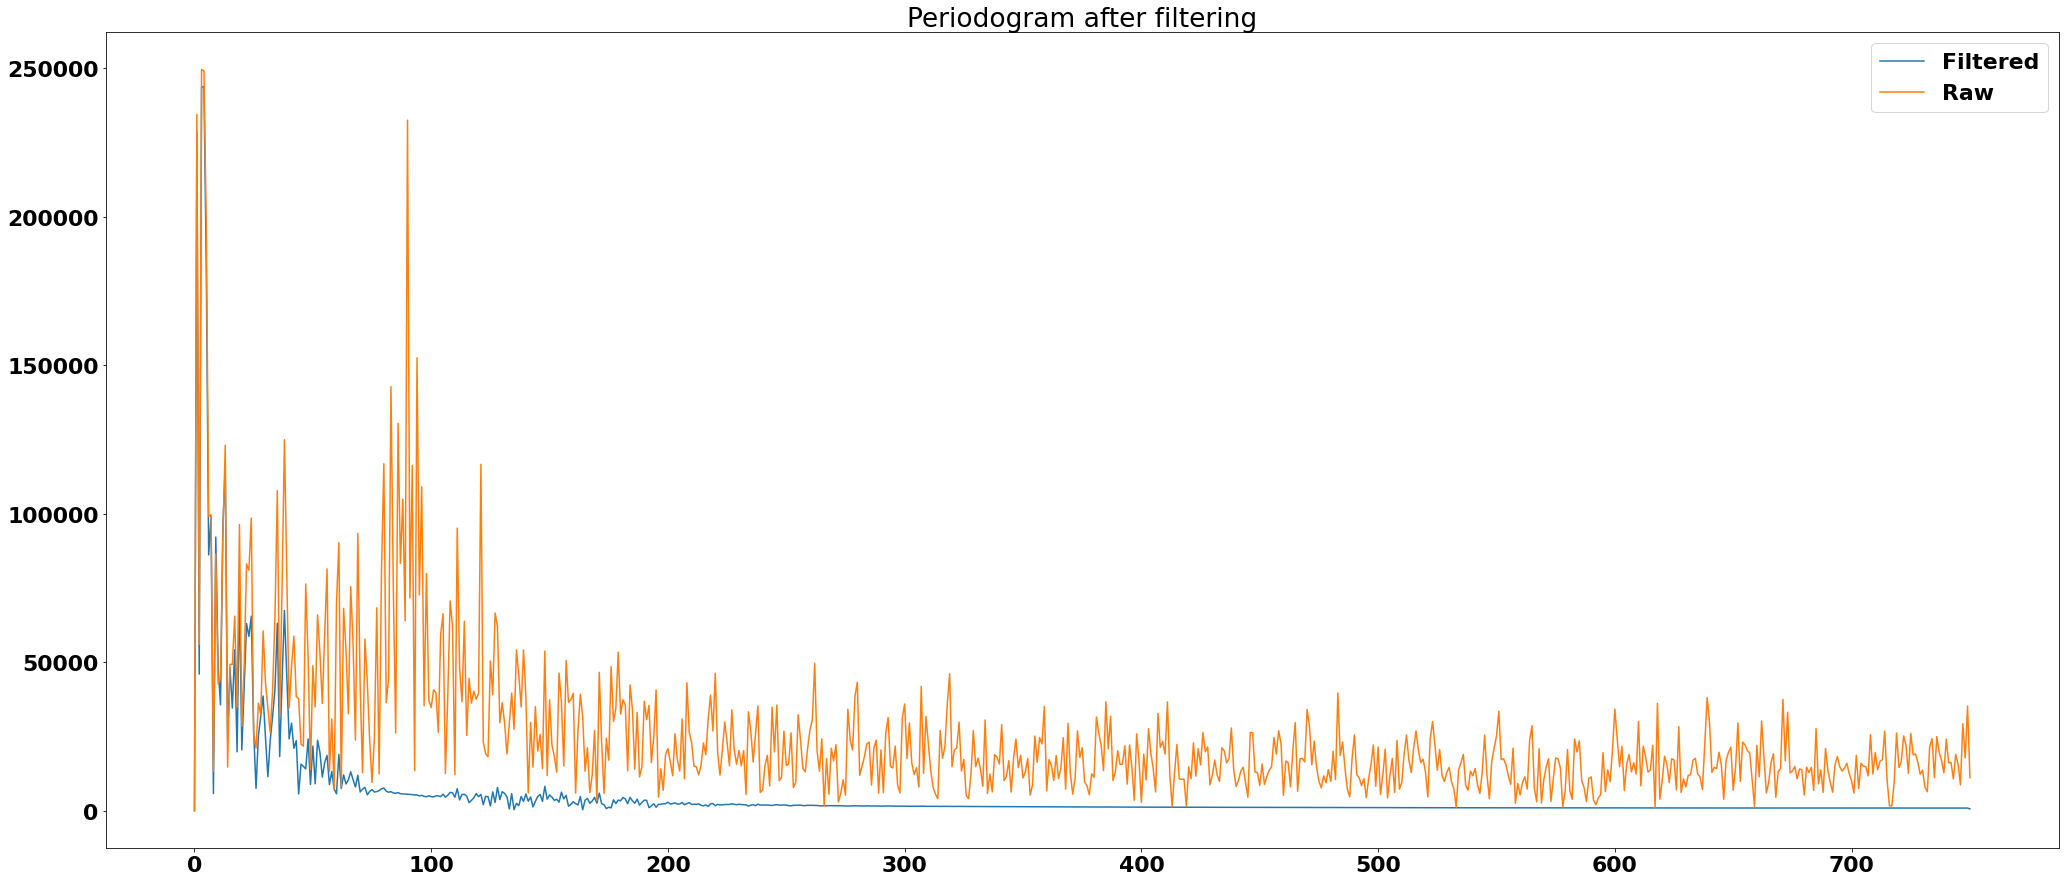

In [759]:
plt.figure(figsize=(35,15))
f, Pxx_spec = scipy.signal.periodogram(r_filtered, fs=1.0);
plt.plot(np.sqrt(Pxx_spec), label="Filtered");
f, Pxx_spec = scipy.signal.periodogram(r_trace, fs=1.0);
plt.plot(np.sqrt(Pxx_spec), label="Raw");
plt.legend()
plt.title("Periodogram after filtering")

## Apply band-stop filter derived from red channel to green

In [760]:

background_per_pix = 14
g_trace = np.array(g['brightness']) - background_per_pix*np.array(g['volume'])
r_trace = np.array(r['brightness']) - background_per_pix*np.array(r['volume'])

ratio = g_trace / r_trace

# Deal with missing
missing_ind = np.where(np.isnan(g_trace))[0]
for i in missing_ind:
#     g_trace[i] = 0.0
#     r_trace[i] = 0.0
    ratio[i] = 0.0
    g_trace[i] = g_trace[i-1]
    r_trace[i] = r_trace[i-1]

In [761]:

# # Apply
# g_filtered = filtfilt(b, a, g_trace)
# g_filtered = filtfilt(b2, a2, g_filtered) # Also low-pass
# g_filtered_with_nan = g_filtered.copy()

# # Add missing back in
# for i in missing_ind:
#     g_filtered_with_nan[i] = np.nan

# plt.figure(figsize=(35,15))
# plt.subplot(211)
# plt.plot(g_filtered_with_nan, label='filtered green')
# shade_using_behavior(behavior_dat['Annotation'])
# plt.legend(loc='upper right')
# plt.xlim([0,1500])

# plt.subplot(212)
# plt.plot(g_trace_with_nan, label='raw green')
# plt.title(f"Green channel filtered using red spectrum")
# plt.xlim([0,1500])
# plt.legend(loc='upper right')
# shade_using_behavior(behavior_dat['Annotation'])

(0.0, 1500.0)

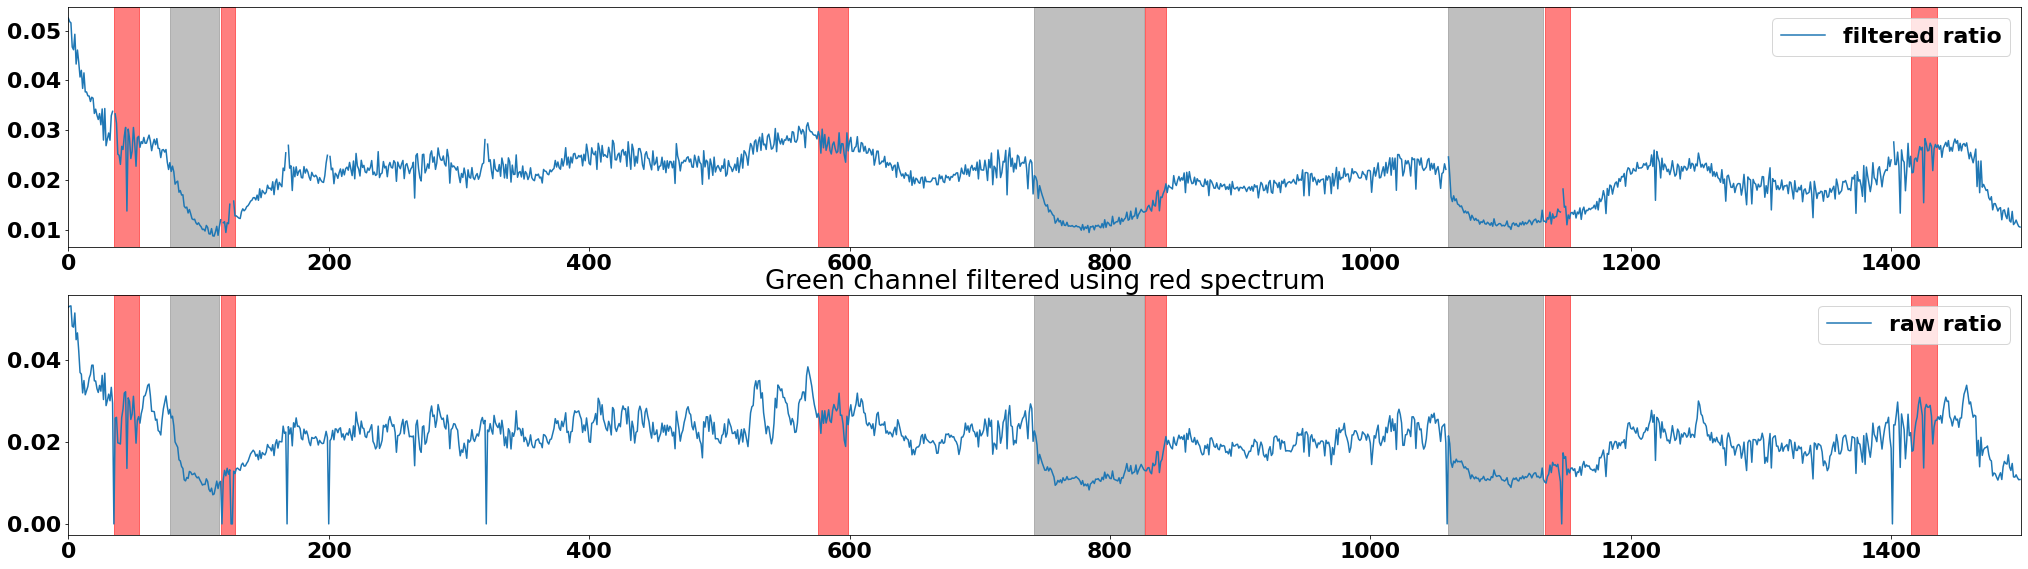

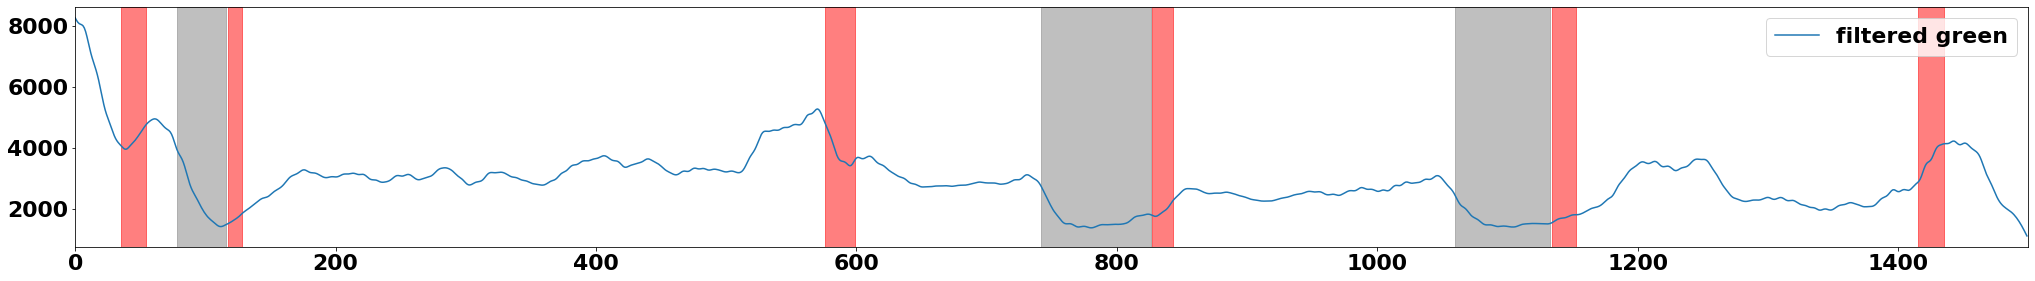

In [764]:
# Do ratio first, then apply filter 

g_filtered = filtfilt(b, a, g_trace)
g_filtered = filtfilt(b2, a2, g_filtered) # Also low-pass
g_filtered_with_nan = g_filtered.copy()

# Apply
ratio_filtered = filtfilt(b, a, ratio)
# ratio_filtered = filtfilt(b2, a2, ratio_filtered) # Also low-pass
ratio_filtered_with_nan = ratio_filtered.copy()

# Add missing back in
for i in missing_ind:
    ratio_filtered_with_nan[i] = np.nan

plt.figure(figsize=(35,15))
plt.subplot(311)
plt.plot(ratio_filtered_with_nan, label='filtered ratio')
shade_using_behavior(behavior_dat['Annotation'])
plt.legend(loc='upper right')
plt.xlim([0,1500])

plt.subplot(312)
plt.plot(ratio, label='raw ratio')
plt.title(f"Green channel filtered using red spectrum")
plt.xlim([0,1500])
plt.legend(loc='upper right')
shade_using_behavior(behavior_dat['Annotation'])

plt.figure(figsize=(35,15))
plt.subplot(313)
plt.plot(g_filtered_with_nan, label='filtered green')
shade_using_behavior(behavior_dat['Annotation'])
plt.legend(loc='upper right')
plt.xlim([0,1500])

Text(0.5, 1.0, 'Periodogram after filtering')

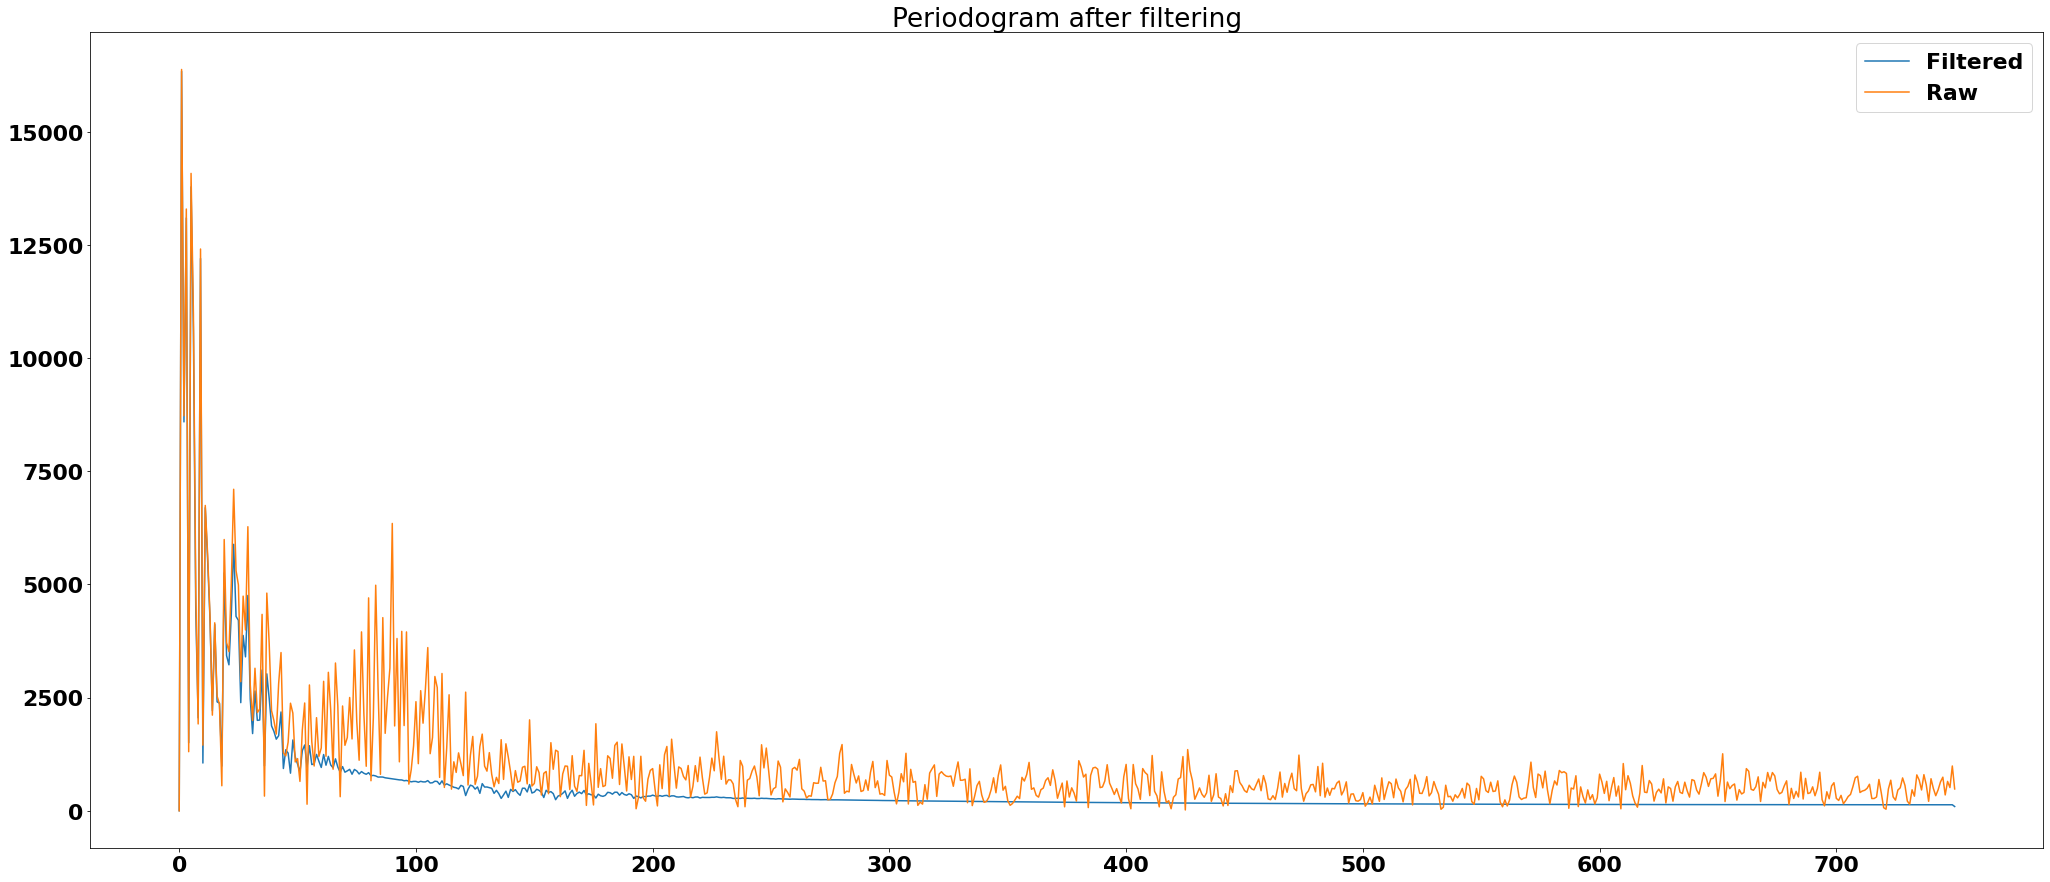

In [763]:
plt.figure(figsize=(35,15))
f, Pxx_spec = scipy.signal.periodogram(g_filtered, fs=1.0);
plt.plot(np.sqrt(Pxx_spec), label="Filtered");
f, Pxx_spec = scipy.signal.periodogram(g_trace, fs=1.0);
plt.plot(np.sqrt(Pxx_spec), label="Raw");
plt.legend()
plt.title("Periodogram after filtering")

## More advanced filtering: spectral subtraction

Following:
https://github.com/shun60s/spectral-subtraction/blob/master/ss1.py

Nevermind, following:
https://abhipray.com/posts/sigproc/classic_speech_enhancement/spectral_subtraction/

In [508]:
import numpy as np
import scipy
import librosa

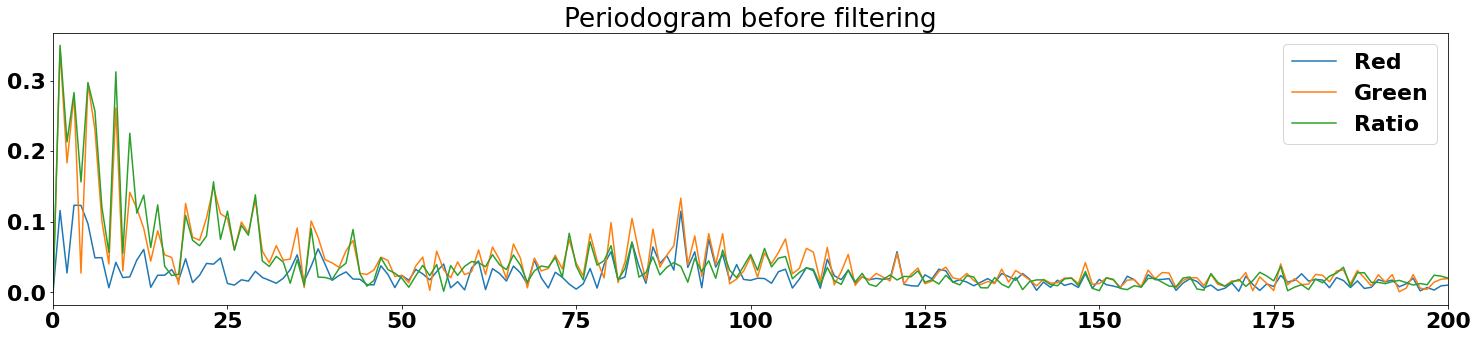

In [509]:
plt.figure(figsize=(25,5))
r_normalized = (r_trace - np.mean(r_trace))
r_normalized /= np.max(r_normalized)
f, Pxx_spec = scipy.signal.periodogram(r_normalized, fs=1.0);
Pxx_spec /= np.sum(Pxx_spec)
plt.plot(0.5*np.sqrt(Pxx_spec), label="Red");

g_normalized = (g_trace - np.mean(g_trace))
g_normalized /= np.max(g_normalized)
f, Pxx_spec = scipy.signal.periodogram(g_normalized, fs=1.0);
Pxx_spec /= np.sum(Pxx_spec)
plt.plot(np.sqrt(Pxx_spec), label="Green");
plt.legend()
plt.title("Periodogram before filtering")

ratio_normalized = g_trace / r_trace
ratio_normalized -= np.mean(ratio_normalized)
ratio_normalized /= np.max(ratio_normalized)
f, Pxx_spec = scipy.signal.periodogram(ratio_normalized, fs=1.0);
Pxx_spec /= np.sum(Pxx_spec)
plt.plot(np.sqrt(Pxx_spec), label="Ratio");

# f, Pxx_spec = scipy.signal.periodogram(ratio_filtered, fs=1.0);
# Pxx_spec /= np.sum(Pxx_spec)
# plt.plot(np.sqrt(Pxx_spec), label="G notch filtered");

plt.xlim([0,200])
plt.legend()

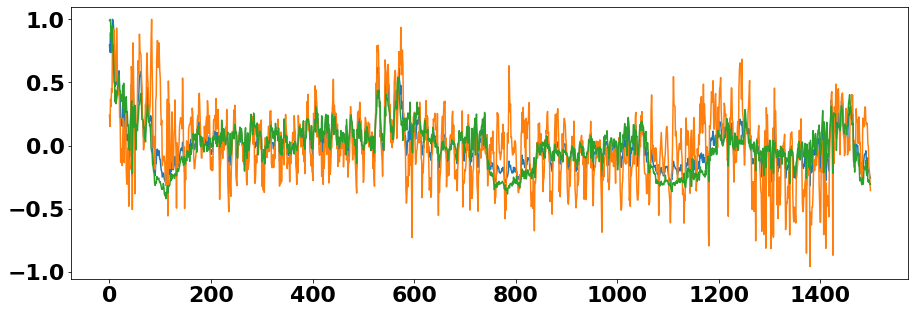

In [510]:
plt.figure(figsize=(15,5))

# ratio_normalized *= 1.1

plt.plot(g_normalized)
plt.plot(r_normalized)
plt.plot(ratio_normalized)

In [511]:
# # First whiten the data so their power spectra are close
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# g_scaled = scaler.fit(g_trace.reshape(-1, 1)).transform(g_trace.reshape(-1, 1))
# r_scaled = scaler.fit(r_trace.reshape(-1, 1)).transform(r_trace.reshape(-1, 1))

In [219]:
# plt.figure(figsize=(15,5))

# plt.plot(g_scaled)
# plt.plot(r_scaled)

# # plt.figure()
# # plt.plot((g_scaled+10) / (r_scaled+10))
# # plt.plot(g_scaled - r_scaled)

In [121]:
# missing_ind = np.where(np.isnan(g_trace))[0]
# for i in missing_ind:
#     g_trace[i] = 0.0
#     r_trace[i] = 0.0

In [437]:
# Signal time series
# s= librosa.stft(g_trace, n_fft=512)    # Short-time Fourier transform
# ss= np.abs(s)         # get magnitude
# angle= np.angle(s)    # get phase
# b=np.exp(1.0j* angle) # use this phase information when Inverse Transform

# ... just do fft and not stft
# green_to_red_ratio = np.nanmean(r_trace / g_trace)
# green_to_red_ratio = 1
# print(green_to_red_ratio)
m = len(r_trace)
n = 2048
t = np.arange(0, m)
window = get_window('boxcar', m)
# green_fft = np.fft.rfft((g_trace - np.mean(g_trace)) * window, n=n)*green_to_red_ratio
# green_fft = np.fft.rfft(g_normalized * window, n=n)
green_fft = np.fft.rfft(ratio_normalized * window, n=n)
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])

In [443]:
# load noise only file, stft, and get mean
# ns= librosa.stft(r_trace, n_fft=512) 
# nss= np.abs(ns)
# mns= np.mean(nss, axis=1) # get mean

# ... just do fft and not stft
# red_fft = np.fft.rfft((r_trace - np.mean(r_trace)) * window, n=n)
red_fft = np.fft.rfft(r_normalized * window, n=n)

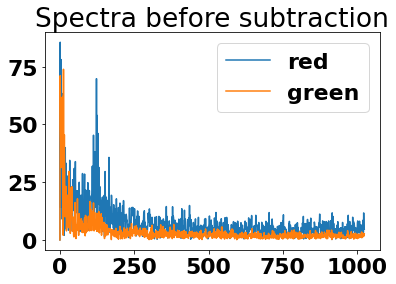

In [444]:
plt.plot(np.abs(red_fft), label='red')
plt.plot(np.abs(green_fft), label='green')
plt.title("Spectra before subtraction")
plt.legend()

In [454]:
# subtract noise spectral mean from input spectral, and istft (Inverse Short-Time Fourier Transform)
# sa= ss - mns.reshape((mns.shape[0],1))  # reshape for broadcast to subtract
# sa0= sa * b  # apply phase information
# y= librosa.istft(sa0) # back to time domain signal
# y= librosa.istft(sa) # back to time domain signal

# ... just use fft
# subtracted_fft = green_fft - red_fft
subtracted_pow = np.abs(green_fft)**2 - np.abs(red_fft)**2
print("Min of subtracted spectrum: ", min(subtracted_fft))
subtracted_pow = np.clip(subtracted_pow, 0, None)
subtracted_phase = np.angle(green_fft)
estimated_fft = np.sqrt(subtracted_pow) * np.exp(1j*subtracted_phase)

# subtracted_fft[:5] = 0

subtracted_signal = 0.1*np.fft.ifft(estimated_fft, n=n)

Min of subtracted spectrum:  0.0


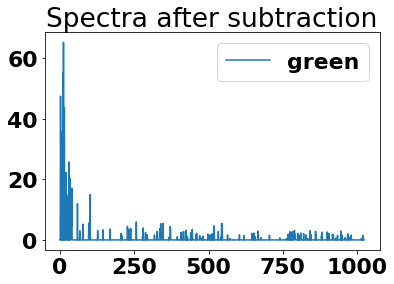

In [455]:
plt.plot(np.abs(estimated_fft), label='green')
plt.title("Spectra after subtraction")
plt.legend()

C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


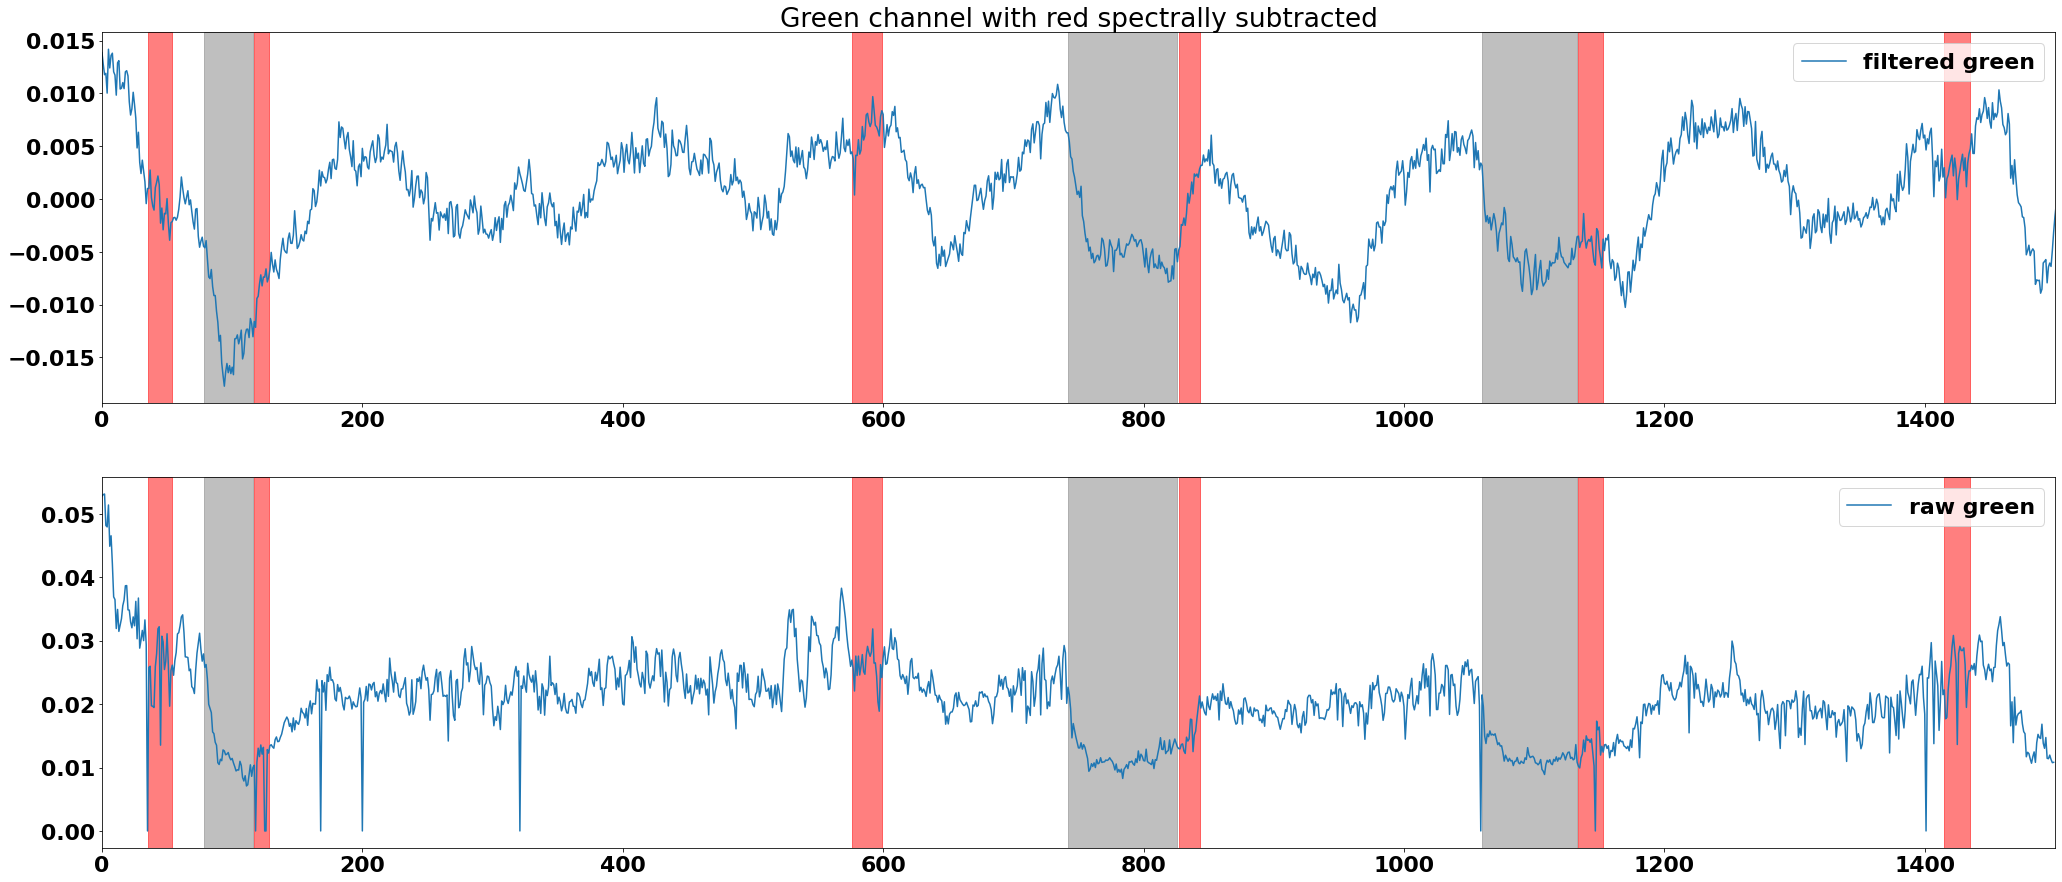

In [456]:

plt.figure(figsize=(35,15))
plt.subplot(211)
plt.plot(subtracted_signal, label='filtered green')
shade_using_behavior(behavior_dat['Annotation'])
plt.legend(loc='upper right')
plt.title(f"Green channel with red spectrally subtracted")
plt.xlim([0,1500])

plt.subplot(212)
plt.plot(ratio, label='raw green')
# plt.plot(g_trace, label='raw green')
plt.xlim([0,1500])
plt.legend(loc='upper right')
shade_using_behavior(behavior_dat['Annotation'])

In [457]:
np.nanmean(r_trace / g_trace)

53.00440576840193

# Periodogram of z

In [472]:
name = 'neuron4207'
neuron_id = 'RMED'
z_dat = np.array(green_dat[name]['z_seg'])

missing_ind = np.where(np.isnan(z_dat))[0]
for i in missing_ind:
    z_dat[i] = 0.0

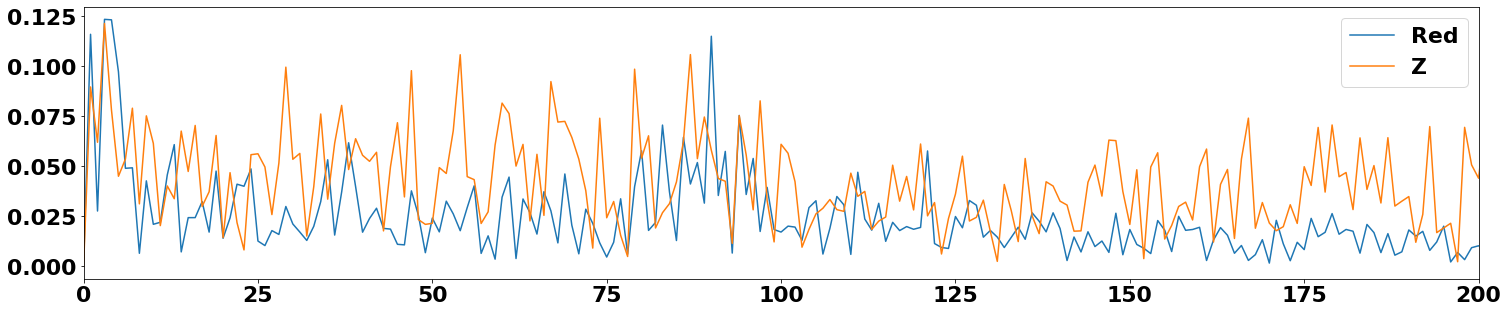

In [474]:
plt.figure(figsize=(25,5))
r_normalized = (r_trace - np.mean(r_trace))
r_normalized /= np.max(r_normalized)
f, Pxx_spec = scipy.signal.periodogram(r_normalized, fs=1.0);
Pxx_spec /= np.sum(Pxx_spec)
plt.plot(0.5*np.sqrt(Pxx_spec), label="Red");

f, Pxx_spec = scipy.signal.periodogram(z_dat, fs=1.0);
Pxx_spec /= np.sum(Pxx_spec)
plt.plot(np.sqrt(Pxx_spec), label="Z");

plt.xlim([0,200])
plt.legend()

# ICA including z and volume

In [476]:
name = 'neuron4207'
neuron_id = 'RMED'
z_dat = np.array(green_dat[name]['z_seg'])
vol_dat = np.array(green_dat[name]['volume'])

r_brightness = np.array(red_dat[name]['brightness'])
g_brightness = np.array(green_dat[name]['brightness'])

missing_ind = np.where(np.isnan(z_dat))[0]
for i in missing_ind:
    z_dat[i] = 0.0
    vol_dat[i] = 0.0
    r_brightness[i] = 0.0
    g_brightness[i] = 0.0

In [477]:
model = FastICA(n_components=4, whiten=True)
X_transformed = model.fit_transform(np.vstack([g_brightness, r_brightness, vol_dat, z_dat]).T)

X_transformed[missing_ind, :] = np.nan
g_trace[missing_ind] = np.nan

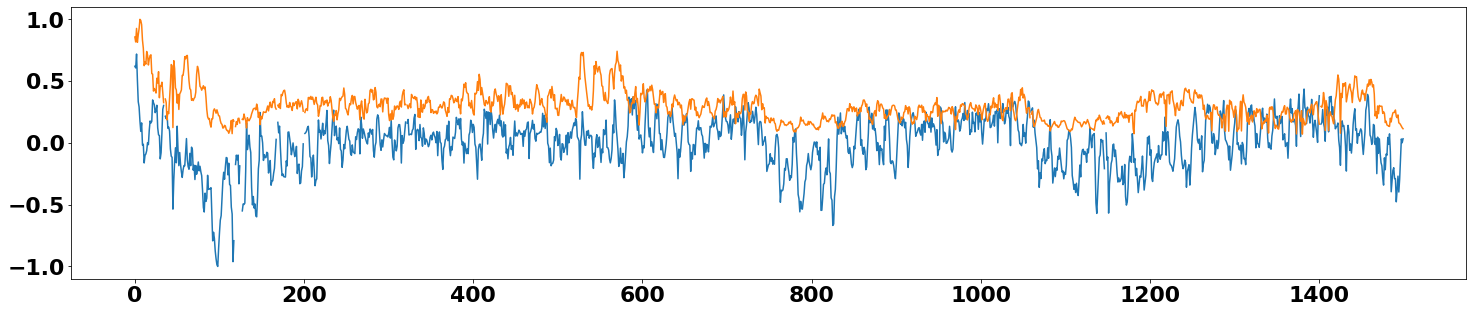

In [503]:
plt.figure(figsize=(25,5))

# plt.plot(X_transformed)
i = 0
plt.plot(-X_transformed[:,i]/np.nanmax(X_transformed[:,i]))
plt.plot(g_trace/np.nanmax(g_trace))

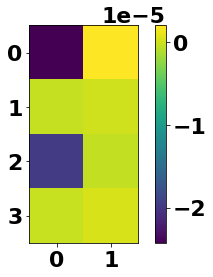

In [489]:
plt.imshow(model.components_[:,:-2])
plt.colorbar()

# Try an acoustics package for better spectrum subtractions

In [602]:
from pyroomacoustics.denoise import apply_spectral_sub, apply_iterative_wiener, apply_subspace

background_per_pix = 14
g_trace = np.array(g['brightness']) - background_per_pix*np.array(g['volume'])
r_trace = np.array(r['brightness']) - background_per_pix*np.array(r['volume'])

ratio = g_trace / r_trace

# Deal with missing
missing_ind = np.where(np.isnan(g_trace))[0]
for i in missing_ind:
#     g_trace[i] = 0.0
#     r_trace[i] = 0.0
    ratio[i] = 0.0
    g_trace[i] = g_trace[i-1]
    r_trace[i] = r_trace[i-1]
    
# import or create `noisy_signal`
# subtracted_signal = apply_spectral_sub(ratio, nfft=128,
#                                      db_reduc=20, lookback=12,
#                                      beta=30, alpha=3)
# wiener_signal = apply_iterative_wiener(g_trace, frame_len=256,
#                                          lpc_order=20, iterations=3,
#                                          alpha=0.8, thresh=0.99)
subspace_signal = apply_subspace(ratio, frame_len=256, mu=10,
                                 lookback=10, skip=2, thresh=0.5)

to_plot = subspace_signal

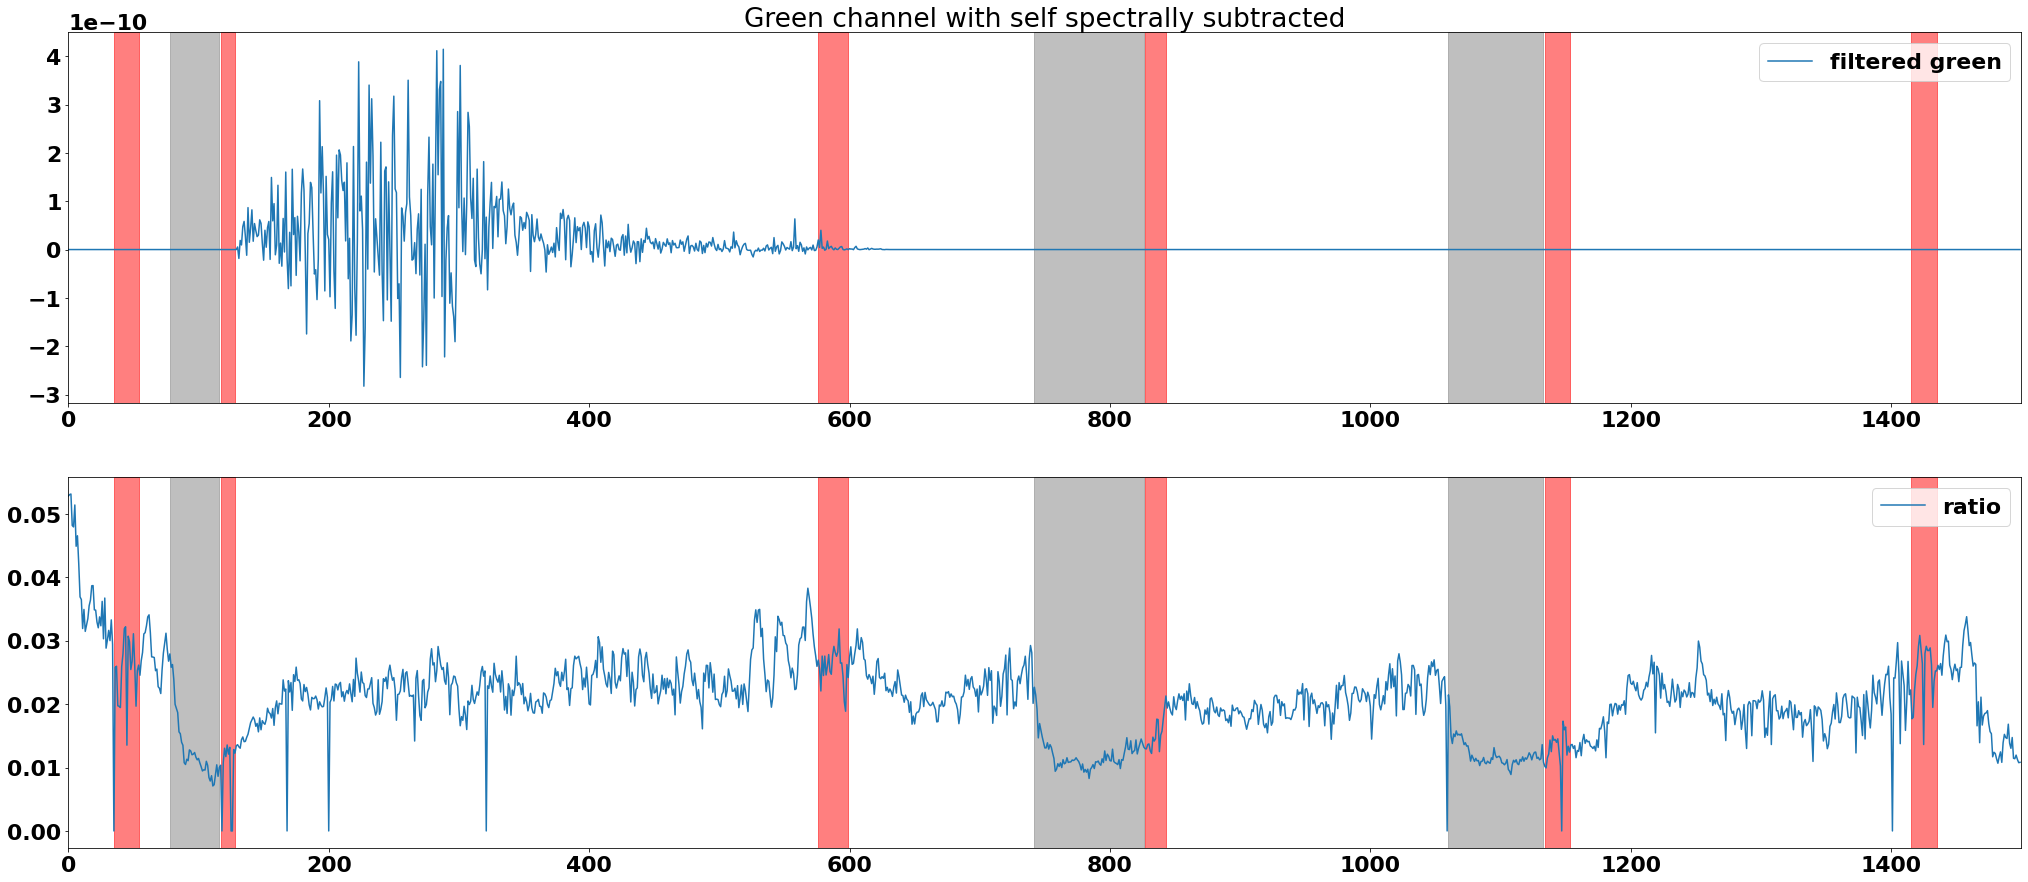

In [603]:

plt.figure(figsize=(35,15))
plt.subplot(211)
plt.plot(to_plot, label='filtered green')
shade_using_behavior(behavior_dat['Annotation'])
plt.legend(loc='upper right')
plt.title(f"Green channel with self spectrally subtracted")
plt.xlim([0,1500])

plt.subplot(212)
plt.plot(ratio, label='ratio')
# plt.plot(g_trace, label='raw green')
plt.xlim([0,1500])
plt.legend(loc='upper right')
shade_using_behavior(behavior_dat['Annotation'])

# Another package

  0%|          | 0/7 [00:00<?, ?it/s]

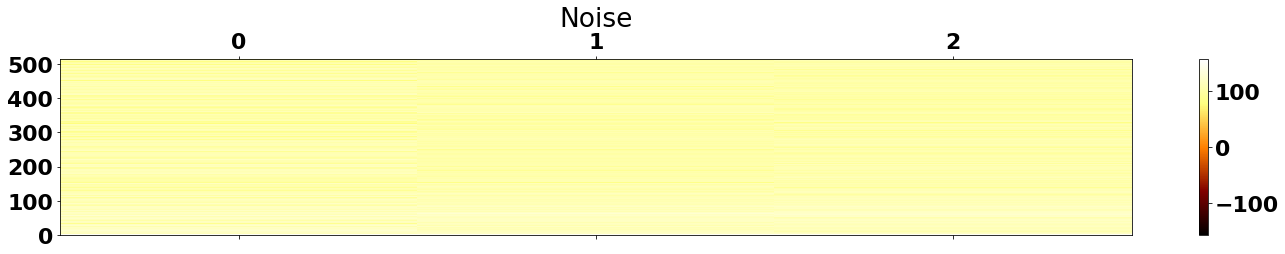

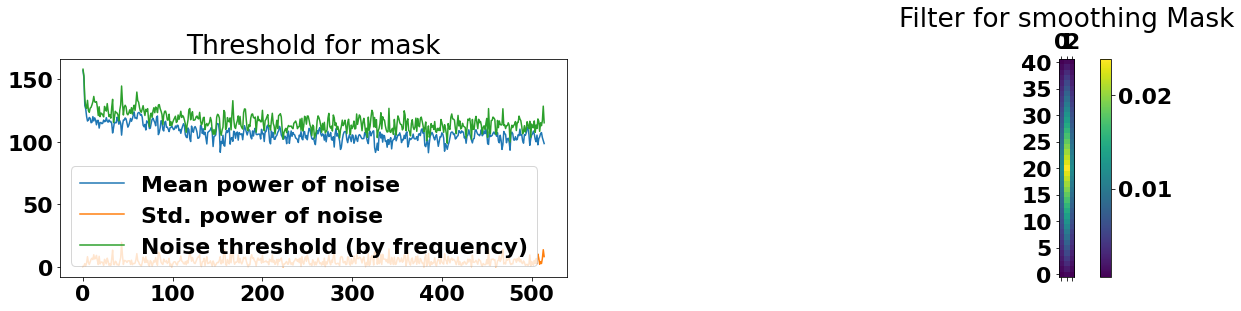

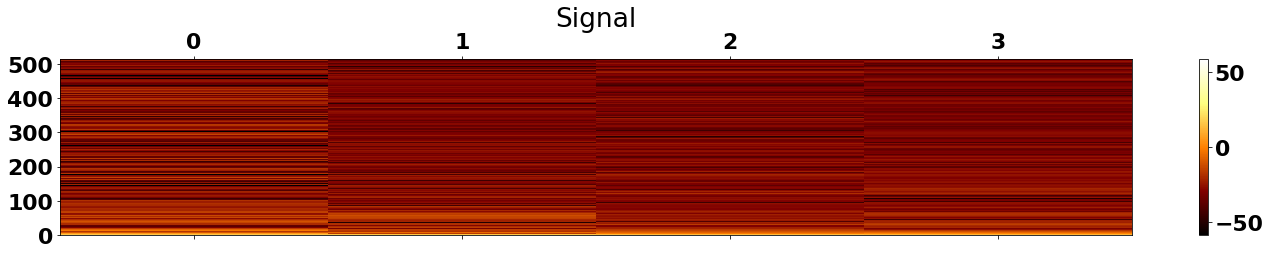

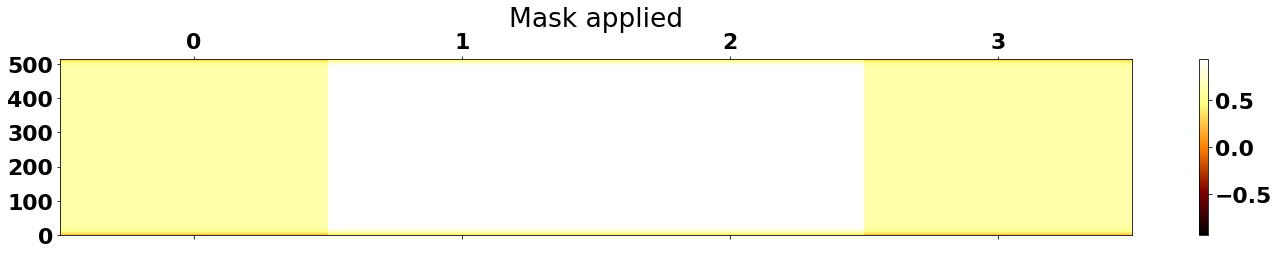

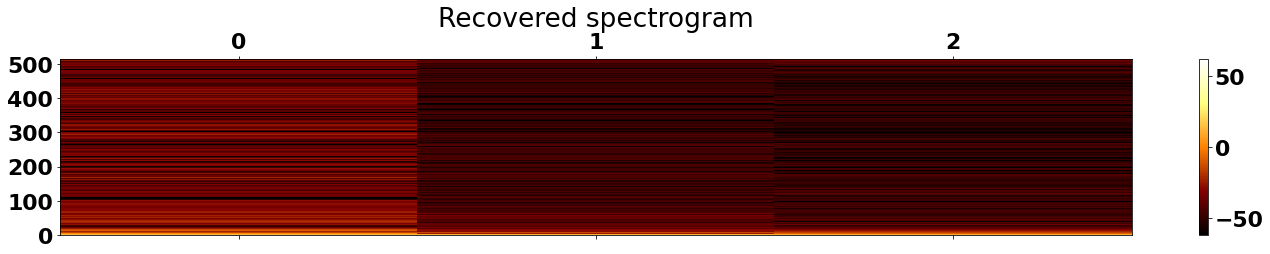

In [705]:
import noisereduce as nr

background_per_pix = 14
g_trace = np.array(g['brightness']) - background_per_pix*np.array(g['volume'])
r_trace = np.array(r['brightness']) - background_per_pix*np.array(r['volume'])

ratio = g_trace / r_trace

# Deal with missing
missing_ind = np.where(np.isnan(g_trace))[0]
for i in missing_ind:
#     g_trace[i] = 0.0
#     r_trace[i] = 0.0
    ratio[i] = 0.0
    g_trace[i] = g_trace[i-1]
    r_trace[i] = r_trace[i-1]
    
# import or create `noisy_signal`
reduced_noise = nr.reduce_noise(audio_clip=ratio, noise_clip=r_trace, win_length=1028, n_fft=1028, n_std_thresh=2.0, n_grad_freq=20, n_grad_time=1, verbose=True)

to_plot = reduced_noise

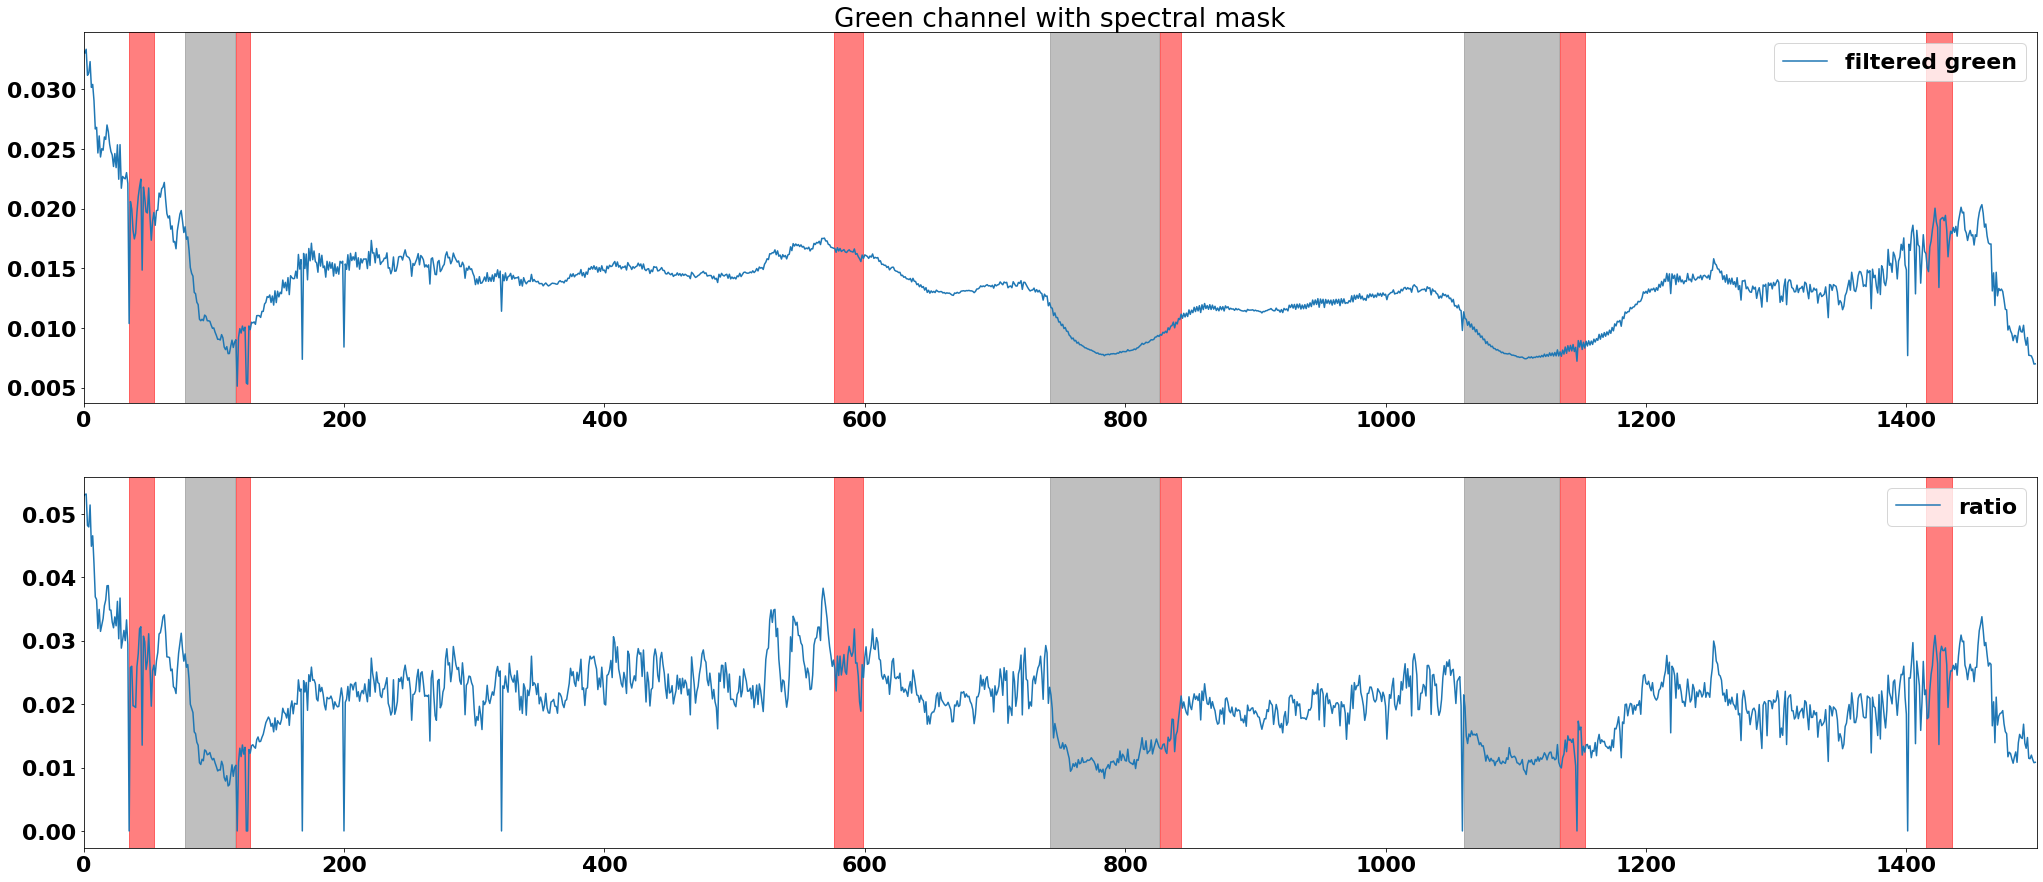

In [706]:

plt.figure(figsize=(35,15))
plt.subplot(211)
plt.plot(to_plot, label='filtered green')
shade_using_behavior(behavior_dat['Annotation'])
plt.legend(loc='upper right')
plt.title(f"Green channel with spectral mask")
plt.xlim([0,1500])

plt.subplot(212)
plt.plot(ratio, label='ratio')
# plt.plot(g_trace, label='raw green')
plt.xlim([0,1500])
plt.legend(loc='upper right')
shade_using_behavior(behavior_dat['Annotation'])